

# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print.

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names. (The Lasso regression problem requires you to split the data yourself)
    1. Problem 1 uses datasets 1_1, 1_2 and 1_3. (Classification)
    2. Problem 2 uses datasets 2_1 and 2_2. (Classification)
    3. Problem 3 uses datasets 3_1. (Regression)
    4. Problem 4 uses a small dataset described within the problem itself. (Regression)
    5. Problems 5,6,7,8 uses classification datasets A,B,C,D  (Classification)
    6. Problem 9 uses dataset LassoReg_data (Regression)

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/"


In [4]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set.

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [5]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    Y_pos = []
    Y_min = []
    result = []
    for i in range(len(X_train)):
        if Y_train[i] == 1:
            Y_pos.append(X_train[i])
        else:
            Y_min.append(X_train[i])

    uplus = np.array(sum(Y_pos) / len(Y_pos))
    uminus = np.array(sum(Y_min) / len(Y_min))
    a = len(Y_pos) / len(X_train)
    for i in range(len(X_test)):
        x = X_test[i]
        prob_1 = (-1 / 2) * np.dot(x - uplus, x - uplus)
        prob_1 = a * prob_1
        prob_0 = (-1 / 2) * np.dot(x - uminus, x - uminus)
        prob_0 = (1 - a) * prob_0
        if prob_1 > prob_0:
            result.append(1)
        else:
            result.append(-1)
    return result



def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    X_pos = []
    X_min = []
    result = []
    cov_var = []

    for i in range(len(X_train)):
        if Y_train[i] == 1:
            X_pos.append(X_train[i])
        else:
            X_min.append(X_train[i])

    uplus = np.array(sum(X_pos) / len(X_pos))

    uminus = np.array(sum(X_min) / len(X_min))

    a = len(X_pos) / len(X_train)

    for i in range(len(X_train)):
        if Y_train[i] == 1:
            u = uplus
        else:
            u = uminus
        sigma1 = np.array((X_train[i] - u))
        sigma2 = sigma1.reshape(-1, 1)
        cov_var.append(sigma2 * sigma1)
    cov_var = np.array(cov_var)
    sigma = np.array(sum(cov_var) / len(cov_var))
    sigmaInv = np.linalg.inv(sigma)

    for i in range(len(X_test)):
        x = X_test[i]
        prob_1 = (-1 / 2) * np.matmul(np.matmul((x - uplus).T, sigmaInv), x - uplus)
        prob_1 = a * prob_1
        prob_0 = (-1 / 2) * np.matmul(np.matmul((x - uminus).T, sigmaInv), x - uminus)
        prob_0 = (1 - a) * prob_0
        if prob_1 > prob_0:
            result.append(1)
        else:
            result.append(-1)
    return result

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    Y_pos = []
    Y_min = []
    result = []
    cov_var1 = []
    cov_var2 = []

    for i in range(len(X_train)):
        if Y_train[i] == 1:
            Y_pos.append(X_train[i])
        else:
            Y_min.append(X_train[i])

    uplus = np.array(sum(Y_pos) / len(Y_pos))
    uminus = np.array(sum(Y_min) / len(Y_min))
    a = len(Y_pos) / len(X_train)

    Y_pos = np.array(Y_pos)
    Y_min = np.array(Y_min)

    cov_var1 = np.cov(Y_pos, rowvar=False)
    cov_var2 = np.cov(Y_min, rowvar=False)
    sigmaInv1 = np.linalg.inv(cov_var1)
    sigmaInv2 = np.linalg.inv(cov_var2)

    for i in range(len(X_test)):
        x = X_test[i]
        prob_1 = (-1 / 2) * np.matmul(np.matmul((x - uplus).T, sigmaInv1), x - uplus)
        prob_1 = a * prob_1
        prob_0 = (-1 / 2) * np.matmul(np.matmul((x - uminus).T, sigmaInv2), x - uminus)
        prob_0 = (1 - a) * prob_0
        if prob_1 > prob_0:
            result.append(1)
        else:
            result.append(-1)
    return result


In [6]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just
# solve the problem for this one example given below.)


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately.

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


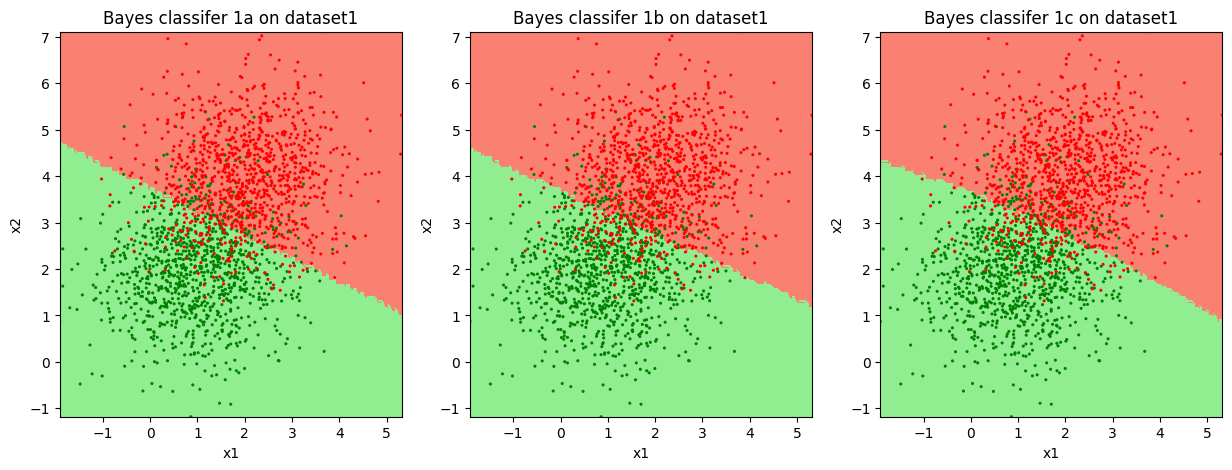

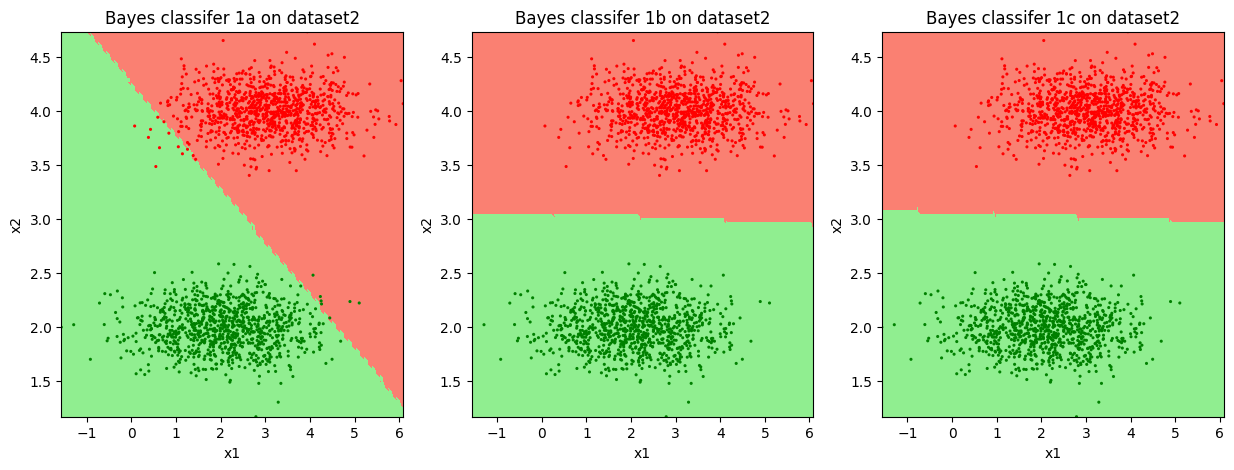

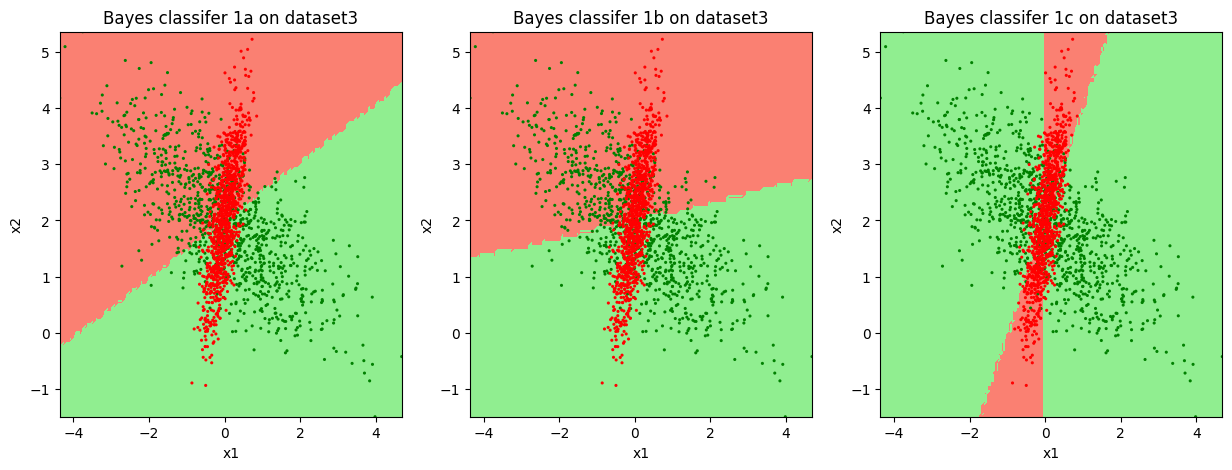

In [9]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here.
# (Use the functions written previously.)
def Plotclassifier(X_train, Y_train, dataset_no, bayes):
    x1_train = X_train[:, 0]
    x2_train = X_train[:, 1]
    x_test = []
    col = []
    for i in range(len(X_train)):
        if Y_train[i] == 1:
            col.append("green")
        else:
            col.append("red")

    x1 = np.linspace(min(x1_train), max(x1_train), 100)
    x2 = np.linspace(min(x2_train), max(x2_train), 100)
    X, Y = np.meshgrid(x1, x2)
    for i in range(100):
        for j in range(100):
            x_test.append([X[i][j], Y[i][j]])
    x_test = np.array(x_test)

    if bayes == 'a':
        z_test = np.array(Bayes1a(X_train, Y_train, x_test))
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.title("Bayes classifer 1a on dataset%d" % dataset_no)
    elif bayes == "b":
        z_test = np.array(Bayes1b(X_train, Y_train, x_test))
        plt.subplot(1, 3, 2)
        plt.title("Bayes classifer 1b on dataset%d" % dataset_no)
    else:
        z_test = np.array(Bayes1c(X_train, Y_train, x_test))
        plt.subplot(1, 3, 3)
        plt.title("Bayes classifer 1c on dataset%d" % dataset_no)


    Z = np.reshape(z_test, [100, 100])
    plt.contourf(X, Y, Z, colors=['salmon', 'lightgreen'])
    plt.scatter(x1_train, x2_train, c=col, s=5, linewidth=0)
    plt.xlabel("x1")
    plt.ylabel("x2")

dataset1 = np.load('Data/dataset1_1.npz')
dataset2 = np.load('Data/dataset1_2.npz')
dataset3 = np.load('Data/dataset1_3.npz')

X_train1 = dataset1['arr_0']
Y_train1 = dataset1['arr_1']
X_test1 = dataset1['arr_2']
Y_test1 = dataset1['arr_3']

Plotclassifier(X_train1, Y_train1, 1, 'a')
Plotclassifier(X_train1, Y_train1, 1, 'b')
Plotclassifier(X_train1, Y_train1, 1, 'c')
plt.show()

X_train2 = dataset2['arr_0']
Y_train2 = dataset2['arr_1']
X_test2 = dataset2['arr_2']
Y_test2 = dataset2['arr_3']

Plotclassifier(X_train2, Y_train2, 2, 'a')
Plotclassifier(X_train2, Y_train2, 2, 'b')
Plotclassifier(X_train2, Y_train2, 2, 'c')
plt.show()

X_train3 = dataset3['arr_0']
Y_train3 = dataset3['arr_1']
X_test3 = dataset3['arr_2']
Y_test3 = dataset3['arr_3']

Plotclassifier(X_train3, Y_train3, 3, 'a')
Plotclassifier(X_train3, Y_train3, 3, 'b')
Plotclassifier(X_train3, Y_train3, 3, 'c')
plt.show()

def error_rate(Y_test, Y_test_pred):
  error = 0
  for i in range(len(Y_test)):
    if Y_test[i] != Y_test_pred[i]:
      error = error+1
  rate = error/len(Y_test)
  return rate

Y_pred_test_1a = Bayes1a(X_train1, Y_train1, X_test1)
Y_pred_test_1b = Bayes1b(X_train1, Y_train1, X_test1)
Y_pred_test_1c = Bayes1c(X_train1, Y_train1, X_test1)

Y_pred_test_2a = Bayes1a(X_train2, Y_train2, X_test2)
Y_pred_test_2b = Bayes1b(X_train2, Y_train2, X_test2)
Y_pred_test_2c = Bayes1c(X_train2, Y_train2, X_test2)

Y_pred_test_3a = Bayes1a(X_train3, Y_train3, X_test3)
Y_pred_test_3b = Bayes1b(X_train3, Y_train3, X_test3)
Y_pred_test_3c = Bayes1c(X_train3, Y_train3, X_test3)

error_rate_1a = error_rate(Y_test1, Y_pred_test_1a)
error_rate_1b = error_rate(Y_test1, Y_pred_test_1b)
error_rate_1c = error_rate(Y_test1, Y_pred_test_1c)

error_rate_2a = error_rate(Y_test2, Y_pred_test_2a)
error_rate_2b = error_rate(Y_test2, Y_pred_test_2b)
error_rate_2c = error_rate(Y_test2, Y_pred_test_2c)

error_rate_3a = error_rate(Y_test3, Y_pred_test_3a)
error_rate_3b = error_rate(Y_test3, Y_pred_test_3b)
error_rate_3c = error_rate(Y_test3, Y_pred_test_3c)

# print(error_rate_1a,error_rate_1b,error_rate_1c)
# print(error_rate_2a,error_rate_2b,error_rate_2c)
#print(error_rate_3a,error_rate_3b,error_rate_3c)

**Cell type : TextWrite**\
**Observations:**
Bayes1a classifier: Assumes features are independent given classes, resulting in a linear

1.   Bayes1a classifier: Assumes features are independent given classes, resulting in a linear decision boundary.
2. Bayes1b classifier: Assumes common covariance matrix, allowing linear decision boundary even with correlated features.
3. Bayes2c classifier: Accounts for different covariance matrices, allowing non-linear decision boundary.
4. In dataset1_1: Features appear uncorrelated, so all classifiers perform similarly.
5. In dataset1_2: Features are correlated but data is linearly separable. Bayes1b and 1c performs better due to covariance consideration.
6. In dataset1_3: No linear boundary can separate data. Bayes1a and Bayes1b fail, but Bayes2c handles non-linear boundaries effectively.
*   For each classifier the error rate is maximum for dataset1_3 and minimum for dataset1_2
*   While comparing the classifiers, the classifier Bayes1c turns out to be the best classifier since it has least error rate compared to Bayes1a and Bayes1b
*   Error rate: Bayes1c< Bayes1b < Bayes1a

**Table of error rates:**

\
\begin{array}{ |c|c|c|c| }
 \hline
 Dataset/Classifier & Bayes 1a & Bayes 1b & Bayes 1c \\
 Dataset1\_1 & 0.126 & 0.1245 & 0.1245 \\
 Dataset1\_2 & 0.0085 & 0.0 & 0.0 \\
 Dataset1\_3 & 0.497 & 0.495 & 0.264 \\
 \hline
\end{array}




** Cell type : TextRead **


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [10]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """
    result = []
    X_train1 = X_train[Y_train == 1, :]
    X_train2 = X_train[Y_train == 2, :]
    X_train3 = X_train[Y_train == 3, :]
    X_train4 = X_train[Y_train == 4, :]

    u1 = np.mean(X_train1, axis=0)
    u2 = np.mean(X_train2, axis=0)
    u3 = np.mean(X_train3, axis=0)
    u4 = np.mean(X_train4, axis=0)

    a1 = len(X_train1) / len(X_train)
    a2 = len(X_train2) / len(X_train)
    a3 = len(X_train3) / len(X_train)
    a4 = len(X_train4) / len(X_train)

    L = np.array([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])

    for i in range(len(X_test)):
        eta1 = a1 * np.exp(-0.5*np.sum((X_test[i] - u1)**2))
        eta2 = a2 * np.exp(-0.5*np.sum((X_test[i] - u2)**2))
        eta3 = a3 * np.exp(-0.5*np.sum((X_test[i] - u3)**2))
        eta4 = a4 * np.exp(-0.5*np.sum((X_test[i] - u4)**2))
        eta = np.array([eta1, eta2, eta3, eta4])
        classes = np.dot(eta, L)
        result.append(np.argmin(classes) + 1)

    return result


def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """
    result = []
    X_train1 = X_train[Y_train == 1,:]
    X_train2 = X_train[Y_train == 2,:]
    X_train3 = X_train[Y_train == 3,:]
    X_train4 = X_train[Y_train == 4,:]

    u1 = np.mean(X_train1, axis=0)
    u2 = np.mean(X_train2, axis=0)
    u3 = np.mean(X_train3, axis=0)
    u4 = np.mean(X_train4, axis=0)

    a1 = len(X_train1)/len(X_train)
    a2 = len(X_train2)/len(X_train)
    a3 = len(X_train3)/len(X_train)
    a4 = len(X_train4)/len(X_train)

    L = np.array([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])

    cov_var1 = np.cov(X_train1, rowvar=False)*len(X_train1)
    cov_var2 = np.cov(X_train2, rowvar=False)*len(X_train2)
    cov_var3 = np.cov(X_train3, rowvar=False)*len(X_train3)
    cov_var4 = np.cov(X_train4, rowvar=False)*len(X_train4)
    cov_var = (cov_var1 + cov_var2 + cov_var3 + cov_var4)/len(X_train)
    cov_var = np.linalg.inv(cov_var)

    for i in range(len(X_test)):
      eta1 = a1*np.exp((-1/2)*np.matmul(np.matmul((X_test[i]-u1),cov_var), X_test[i]-u1))
      eta2 = a2*np.exp((-1/2)*np.matmul(np.matmul((X_test[i]-u2),cov_var), X_test[i]-u2))
      eta3 = a3*np.exp((-1/2)*np.matmul(np.matmul((X_test[i]-u3),cov_var), X_test[i]-u3))
      eta4 = a4*np.exp((-1/2)*np.matmul(np.matmul((X_test[i]-u4),cov_var), X_test[i]-u4))
      eta = np.array([eta1, eta2, eta3, eta4])
      classes = np.dot(eta, L)
      result.append(np.argmin(classes) + 1)

    return result


def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """
    result = []
    X_train1 = X_train[Y_train == 1,:]
    X_train2 = X_train[Y_train == 2,:]
    X_train3 = X_train[Y_train == 3,:]
    X_train4 = X_train[Y_train == 4,:]

    u1 = np.mean(X_train1, axis=0)
    u2 = np.mean(X_train2, axis=0)
    u3 = np.mean(X_train3, axis=0)
    u4 = np.mean(X_train4, axis=0)

    a1 = len(X_train1)/len(X_train)
    a2 = len(X_train2)/len(X_train)
    a3 = len(X_train3)/len(X_train)
    a4 = len(X_train4)/len(X_train)

    L = np.array([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])

    cov_var1 = np.cov(X_train1, rowvar=False)
    cov_var1 = np.linalg.inv(cov_var1)
    cov_var2 = np.cov(X_train2, rowvar=False)
    cov_var2 = np.linalg.inv(cov_var2)
    cov_var3 = np.cov(X_train3, rowvar=False)
    cov_var3 = np.linalg.inv(cov_var3)
    cov_var4 = np.cov(X_train4, rowvar=False)
    cov_var4 = np.linalg.inv(cov_var4)

    for i in range(len(X_test)):
      eta1 = a1*np.exp((-1/2)*np.matmul(np.matmul((X_test[i]-u1),cov_var1), X_test[i]-u1))
      eta2 = a2*np.exp((-1/2)*np.matmul(np.matmul((X_test[i]-u2),cov_var2), X_test[i]-u2))
      eta3 = a3*np.exp((-1/2)*np.matmul(np.matmul((X_test[i]-u3),cov_var3), X_test[i]-u3))
      eta4 = a4*np.exp((-1/2)*np.matmul(np.matmul((X_test[i]-u4),cov_var4), X_test[i]-u4))
      eta = np.array([eta1, eta2, eta3, eta4])
      classes = np.dot(eta, L)
      result.append(np.argmin(classes) + 1)

    return result



In [11]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately.

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets.


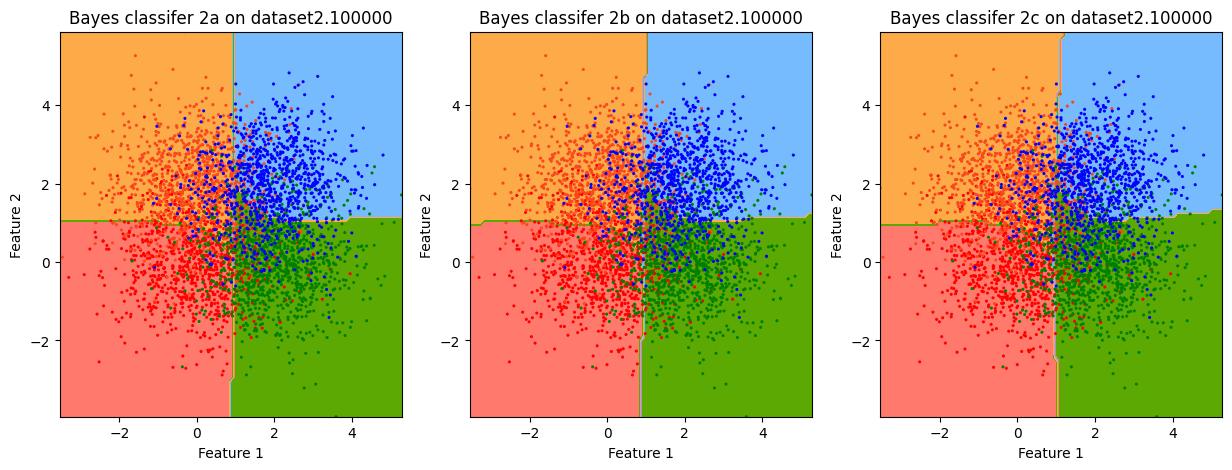

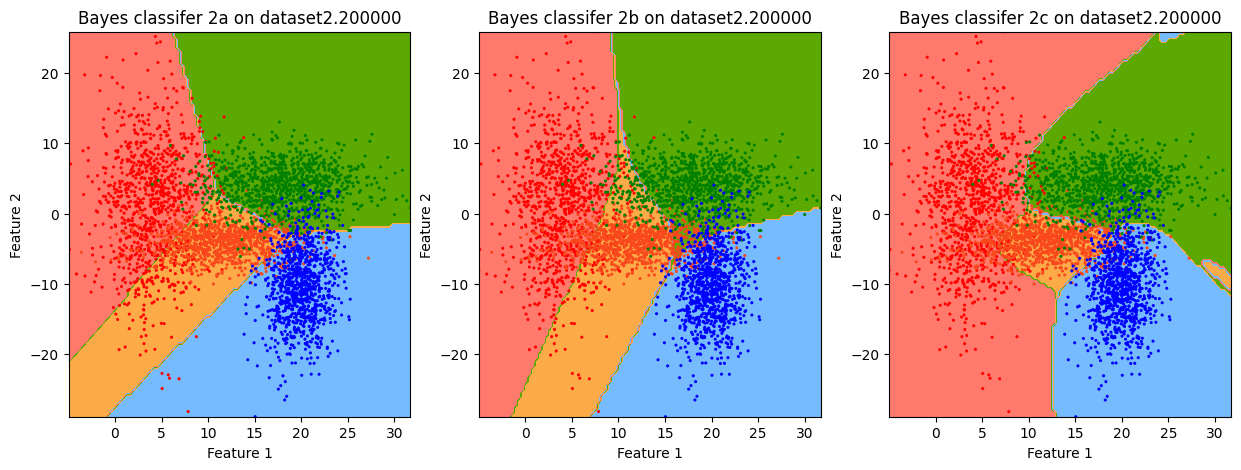

In [12]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here.
# (Use the functions written previously.)

def plot_classifier(X_train, Y_train, dataset_no, bayes):
    x1_train = X_train[:, 0]
    x2_train = X_train[:, 1]
    x_test = []
    col = []
    for i in range(len(X_train)):
        if Y_train[i] == 1:
            col.append("red")
        elif Y_train[i] == 2:
            col.append("#f8481c")
        elif Y_train[i] == 3:
            col.append("green")
        else:
            col.append("blue")

    x1 = np.linspace(min(x1_train), max(x1_train), 100)
    x2 = np.linspace(min(x2_train), max(x2_train), 100)
    X, Y = np.meshgrid(x1, x2)

    for i in range(100):
        for j in range(100):
            x_test.append([X[i, j], Y[i, j]])
    x_test = np.array(x_test)
    if bayes == 'a':
        z_test = np.array(Bayes2a(X_train, Y_train, x_test))
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.title("Bayes classifer 2a on dataset%f" % dataset_no)
    elif bayes == "b":
        z_test = np.array(Bayes2b(X_train, Y_train, x_test))
        plt.subplot(1, 3, 2)
        plt.title("Bayes classifer 2b on dataset%f" % dataset_no)
    else:
        z_test = np.array(Bayes2c(X_train, Y_train, x_test))
        plt.subplot(1, 3, 3)
        plt.title("Bayes classifer 2c on dataset%f" % dataset_no)

    Z_test = np.reshape(z_test, [100, 100])

    plt.contourf(X, Y, Z_test, colors=['#ff796c','#5ca904','#fdaa48','#75bbfd'])
    plt.scatter(x1_train, x2_train, c=col, s=5, linewidth=0)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")




dataset2_1 = np.load('Data/dataset2_1.npz')
dataset2_2 = np.load('Data/dataset2_2.npz')

X_train1 = dataset2_1['arr_0']
Y_train1 = dataset2_1['arr_1']
X_test1 = dataset2_1['arr_2']
Y_test1 = dataset2_1['arr_3']

plot_classifier(X_train1, Y_train1, 2.1, 'a')
plot_classifier(X_train1, Y_train1, 2.1, 'b')
plot_classifier(X_train1, Y_train1, 2.1, 'c')
plt.show()

X_train2 = dataset2_2['arr_0']
Y_train2 = dataset2_2['arr_1']
X_test2 = dataset2_2['arr_2']
Y_test2 = dataset2_2['arr_3']

plot_classifier(X_train2, Y_train2, 2.2, 'a')
plot_classifier(X_train2, Y_train2, 2.2, 'b')
plot_classifier(X_train2, Y_train2, 2.2, 'c')
plt.show()

def error_rate(Y1, Y2):
  l = 0
  lossMatrix = [[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]]
  '''Y1 real Y2 pred'''
  for i in range(len(Y1)):
    l += lossMatrix[int(Y1[i])-1][int(Y2[i])-1]
  l /= len(Y1)
  return l

Y_pred_test_1a = Bayes2a(X_train1, Y_train1, X_test1)
Y_pred_test_1b = Bayes2b(X_train1, Y_train1, X_test1)
Y_pred_test_1c = Bayes2c(X_train1, Y_train1, X_test1)

Y_pred_test_2a = Bayes2a(X_train2, Y_train2, X_test2)
Y_pred_test_2b = Bayes2b(X_train2, Y_train2, X_test2)
Y_pred_test_2c = Bayes2c(X_train2, Y_train2, X_test2)

error_rate_1a = error_rate(Y_test1, Y_pred_test_1a)
error_rate_1b = error_rate(Y_test1, Y_pred_test_1b)
error_rate_1c = error_rate(Y_test1, Y_pred_test_1c)

error_rate_2a = error_rate(Y_test2, Y_pred_test_2a)
error_rate_2b = error_rate(Y_test2, Y_pred_test_2b)
error_rate_2c = error_rate(Y_test2, Y_pred_test_2c)


def confusion_matrix(Y_true, Y_pred):
    # Initialize confusion matrix as a 4x4 matrix of zeros
    cm = [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]]

    # Iterate over true and predicted labels to update the confusion matrix
    for true, pred in zip(Y_true, Y_pred):
        true_idx = int(true) - 1
        pred_idx = int(pred) - 1
        cm[true_idx][pred_idx] += 1

    return cm

c21a = confusion_matrix(Y_test1,Y_pred_test_1a)
c21b = confusion_matrix(Y_test1,Y_pred_test_1b)
c21c = confusion_matrix(Y_test1,Y_pred_test_1c)
c22a = confusion_matrix(Y_test2,Y_pred_test_2a)
c22b = confusion_matrix(Y_test2,Y_pred_test_2b)
c22c = confusion_matrix(Y_test2,Y_pred_test_2c)

# print(c21a, c21b, c21c)
# print(c22a, c22b, c22c)
# print(error_rate_1a, error_rate_1b, error_rate_1c, error_rate_2a, error_rate_2b, error_rate_2c)

** Cell type : TextWrite **
(Write your observations and table of errors here)\\



1. Bayes 2a: Works for data with independent features given labels and linear separability.

2. Bayes 2b: Suitable for data with common covariance matrix among class distributions.

3. Bayes 2c: Handles data with different covariance matrices for class distributions, offering more flexibility.

4. For dataset2_1: All models have similar decision boundaries due to uncorrelated features per class. Bayes 2c has the lowest expected loss.

5. For dataset2_2: Bayes 2a performs poorly as it relies only on mean vectors. Bayes 2b performs similarly due to inability to handle varying feature correlations. Bayes 2c excels with different covariance matrices, shown by the confusion matrix.


**Table showing the expected loss :**
\begin{array}{ccc}
\text{Classifier\Dataset}&\text{dataset2_1}&\text{dataset2_2}\\
\text{Bayes2a}&0.42975&0.1835\\
\text{Bayes2b}&0.429&0.1895\\
\text{Bayes2c}&0.42925&0.15025\\
\end{array}

The Confusion matrices for the three classifiers, evaluated for both the datasets are as follows :

Dataset 2_1

Confusion matrix for Bayes2a :
$\begin{bmatrix} 633& 219& 136&  12\\ 97& 738&  62& 103\\86&  49& 770&  95\\ 15& 136& 194& 655 \end{bmatrix}$
  
Confusion matrix for Bayes2b :
$\begin{bmatrix} 633& 218& 137&  12\\ 95& 743&  60& 102\\ 84& 49& 773&  94\\16& 137& 196& 651 \end{bmatrix}$


Confusion matrix for Bayes2c :
$\begin{bmatrix}638& 216& 135& 11\\99& 746& 58& 97\\ 89& 47& 773& 91\\ 16& 141& 201& 642 \end{bmatrix}$



Dataset 2_2

Confusion matrix for Bayes2a :
$\begin{bmatrix} 830& 150&  18&  2\\ 93& 784&  46& 77\\ 30&  61& 905& 4\\ 0&  23& 78&899\end{bmatrix}$

Confusion matrix for Bayes2b :
$\begin{bmatrix} 891&106& 3&  0\\ 119& 691& 124& 66\\ 23&106&864& 7\\ 0&   5& 102& 893 \end{bmatrix}$


Confusion matrix for Bayes2c :
$\begin{bmatrix}901&  80&  19& 0\\64& 824& 46& 66\\ 19&  31& 936&  14\\ 0&  36&  48& 916 \end{bmatrix}$


In [ ]:
# Cell type: convenience



**Cell type : TextRead**


# Problem 3 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset3_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the approppriate number samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels .

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




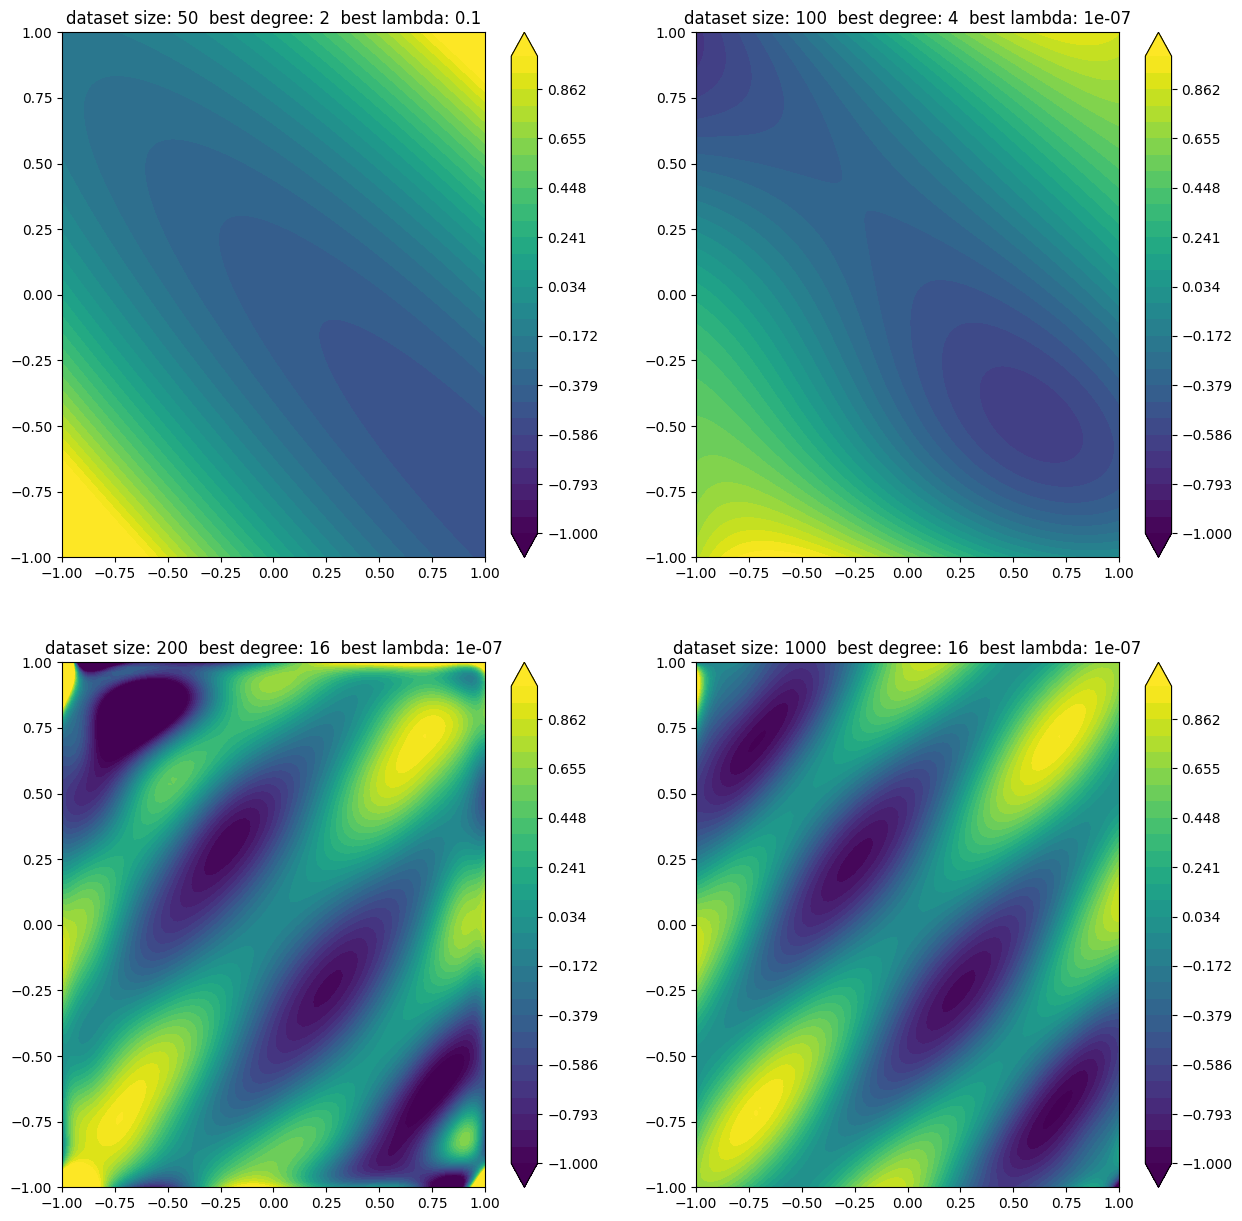

In [13]:
# Cell type : CodeWrite
import numpy as np
import matplotlib.pyplot as plt


def poly_ridge_train(X_train,Y_train,degree,lamda):
  k = degree
  d_new = ((k+2)*(k+1))//2
  X1 = X_train[:,0]
  X2 = X_train[:,1]
  x1 = np.zeros((len(X_train), degree+1))
  x2 = np.zeros((len(X_train), degree+1))

  for i in range(k+1):
    x1[:,i] = X1**i
    x2[:,i] = X2**i

  Phi = np.zeros((len(X_train), d_new))
  index = 0
  for i in range(k + 1):
      for j in range(k + 1):
          if i + j <= k:
              Phi[:, index] = x1[:, i] * x2[:, j]
              index += 1

  w_c = np.linalg.inv(np.matmul(Phi.T,Phi) + lamda*np.eye(d_new))
  w = w_c@Phi.T@Y_train
  return w

def poly_ridge_pred(X_test, w, degree):
    k = degree
    d_new = ((k + 2) * (k + 1)) // 2
    X1 = X_test[:, 0]
    X2 = X_test[:, 1]
    x1 = np.zeros((len(X_test), degree + 1))
    x2 = np.zeros((len(X_test), degree + 1))

    for i in range(k + 1):
        x1[:, i] = X1 ** i
        x2[:, i] = X2 ** i

    Phi = np.zeros((len(X_test), d_new))
    index = 0
    for i in range(k + 1):
        for j in range(k + 1):
            if i + j <= k:
                Phi[:, index] = x1[:, i] * x2[:, j]
                index += 1

    return np.matmul(Phi, w)


data3_1 = np.load('Data/dataset3_1.npz')
X_train = data3_1['arr_0']
Y_train = data3_1['arr_1']
X_test = data3_1['arr_2']
Y_test = data3_1['arr_3']

xtrain_size = [50,100,200,1000]
degree = [1,2,4,8,16]
lamda = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]
test_sq_error = np.zeros((len(xtrain_size),len(degree), len(lamda)))
train_sq_error = np.zeros_like(test_sq_error)
best_param = np.zeros((4,2))


for i in range(len(xtrain_size)):
  for k in range(len(degree)):
    for r in range(len(lamda)):
      w_predicted = poly_ridge_train(X_train[:xtrain_size[i],:], Y_train[:xtrain_size[i]], degree[k], lamda[r])
      y_train_pred = poly_ridge_pred(X_train[:xtrain_size[i],:], w_predicted, degree[k])
      y_test_pred = poly_ridge_pred(X_test, w_predicted, degree[k])

      test_sq_error[i,k,r] = np.mean((Y_test-y_test_pred)**2)
      train_sq_error[i,k,r] = np.mean((Y_train[:xtrain_size[i]]-y_train_pred)**2)
  min_index_flat = np.argmin(test_sq_error[i])
  best_param[i,:] = np.unravel_index(min_index_flat, test_sq_error[i].shape)


X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
X_ = X.copy().reshape(-1,1)
Y_ = Y.copy().reshape(-1,1)

X_test = np.hstack((X_,Y_))
plt.figure(figsize=(15,15))

for i in range(len(xtrain_size)):

    i1 = int(best_param[i,0])
    i2 = int(best_param[i,1])

    wt = poly_ridge_train(X_train[:xtrain_size[i],:], Y_train[:xtrain_size[i]], degree[i1], lamda[i2])

    Z = poly_ridge_pred(X_test, wt, degree[i1]).reshape(100,100)

    title = f"dataset size: {xtrain_size[i]}  best degree: {degree[i1]}  best lambda: {lamda[i2]}"
    plt.subplot(2,2,i+1)
    plt.contourf(X,Y,Z,levels=np.linspace(-1,1., 30), cmap='viridis', extend='both')
    plt.title(title)
    plt.colorbar()
plt.show()



** Cell type : TextWrite **
Dataset Size:	50

MSE train

lambda    |      1e-9 |       1e-7|      1e-5 |   1e-3 |  1e-1|1e1
--- | --- | --- |--- |--- |--- |---
Degree 1 | 0.250383    | 0.250383   | 0.250383  | 0.250384  | 0.255898 | 0.303147
Degree 2  | 0.134112    | 0.134112   | 0.134112  | 0.134213  | 0.197483 | 0.30166  
Degree 4  | 0.102018    | 0.102018   | 0.102019  | 0.104107  | 0.180638 | 0.299921
Degree 8  | 0.000199157 | 0.0107658  | 0.0417213 | 0.081991  | 0.1632  | 0.298387
Degree 16  | 9.367e-06   | 0.00131769 | 0.0311131 | 0.0700207 | 0.150013 | 0.297318

MSE test

lambda    |    1e-9 |      1e-7|     1e-5 |    1e-3 |   1e-1 |  1e1
--- | --- | --- |--- |--- |--- |---
Degree 1  | 0.301267 |  0.301267 | 0.301262 | 0.300838 | 0.278351 | 0.265042
Degree 2  |  0.1579   |  0.1579   | 0.157886| 0.156735 | 0.208224 | 0.263793
Degree 4  |   0.157334 |  0.157333 | 0.157243 | 0.161826 | 0.196569 | 0.26305
Degree 8  | 172.502    | 18.5943   | 0.990251 | 0.165156 | 0.193919 | 0.262405
Degree 16 | 232.025    | 66.6977   | 2.33731  | 0.203961 | 0.196057 | 0.262057


Dataset Size:	100

MSE train

lambda   |        1e-9 |       1e-7 |      1e-5 |      1e-3 |    1e-1 |     1e1
--- | --- | --- |--- |--- |--- |---
Degree 1     | 0.258091    | 0.258091   | 0.258091  | 0.258091  | 0.25874  | 0.273185
Degree 2     | 0.130951    | 0.130951   | 0.130951  | 0.130966  | 0.164968 | 0.270714
Degree 4     | 0.113027    | 0.113027   | 0.113027  | 0.113651  | 0.152373 | 0.268649
Degree 8     | 0.0415879  | 0.04168    | 0.0580085 | 0.0929016 | 0.144886 | 0.266537
Degree 16    | 0.000483967 | 0.00754402 | 0.0417292 | 0.0836969 | 0.139544 | 0.265013

MSE test

lambda   |     1e-9 |      1e-7 |     1e-5 |     1e-3 |     1e-1 |      1e1
--- | --- | --- |--- |--- |--- |---
Degree 1     |  0.273149 |  0.273149 | 0.273148 | 0.273083 | 0.268622 | 0.264962
Degree 2     |  0.15321  | 0.15321  |0.153207 | 0.152916 | 0.175709 | 0.262612
Degree 4    |  0.142776 | 0.142776 | 0.142808 | 0.14602  | 0.16898  | 0.26114
Degree 8     |  0.71132  |  0.580759 | 0.203638 | 0.162628 | 0.171168 | 0.259777
Degree 16    | 11.7704   | 23.4166   | 0.417849 | 0.188359 | 0.17416  | 0.25899  



Dataset Size:	200

MSE train

lambda   |       1e-9 |      1e-7 |      1e-5 |      1e-3 |     1e-1 |      1e1
--- | --- | --- |--- |--- |--- |---
Degree 1     | 0.246535   | 0.246535  | 0.246535  | 0.246535  | 0.246641 | 0.257631
Degree 2     | 0.133665   | 0.133665  | 0.133665  | 0.133669  | 0.147549 |0.253672
Degree 4    | 0.113338   | 0.113338  | 0.113338 |  0.11359   | 0.144444 | 0.250818
Degree 8     | 0.0617373  | 0.0617381 | 0.0639497 | 0.0956872 | 0.141193 | 0.247986
Degree 16    | 0.00108543 | 0.0113256 | 0.0444633 | 0.0834996 | 0.133763 | 0.2459   

MSE test

lambda   |      1e-9 |     1e-7 |      1e-5 |     1e-3 |     1e-1 |      1e1
--- | --- | --- |--- |--- |--- |---
Degree 1     | 0.267663  | 0.267663 | 0.267663  | 0.267646 | 0.266225 | 0.263931
Degree 2     | 0.145781  | 0.145781 | 0.14578   | 0.145754 | 0.158682 | 0.259707
Degree 4     | 0.131171  | 0.131171 | 0.131164  | 0.130831 | 0.157085 | 0.257042
Degree 8     | 0.137359  | 0.136982 | 0.118183  | 0.113965 | 0.156451 | 0.254477
Degree 16    | 0.0837102 | 0.170807 | 0.0869037 | 0.111214 | 0.152244 | 0.252813



Dataset Size:	1000

MSE train

lambda -->   |       1e-9 |      1e-7 |     1e-5 |   1e-3 |   1e-1  |  1e1
--- | --- | --- |--- |--- |--- |---
Degree 1     | 0.240728    | 0.240728   | 0.240728  | 0.240728  | 0.240729 | 0.241415
Degree 2     | 0.138824    | 0.138824   | 0.138824  | 0.138824  | 0.139718 | 0.224383
Degree 4     | 0.125017    | 0.125017   | 0.125017  | 0.125025  | 0.134172 | 0.216019
Degree 8     | 0.0767429   | 0.0767429  | 0.0768462 | 0.094838  | 0.128438 | 0.209933
Degree 16    | 0.000445127 | 0.00653349 | 0.0384153 | 0.0849926 | 0.121687 | 0.207497


MSE test

lambda -->   |       1e-9 |      1e-7 |      1e-5 |     1e-3 |     1e-1|      1e1
--- | --- | --- |--- |--- |--- |---
Degree 1     | 0.262535   | 0.262535  | 0.262535  | 0.262535  | 0.26253  | 0.263461
Degree 2     | 0.142429   | 0.142429  | 0.142429  | 0.142442  | 0.144519 | 0.24446
Degree 4     | 0.12708    | 0.12708   | 0.127081  | 0.127242  | 0.140937 | 0.235338
Degree 8     | 0.0848126  | 0.0848003 | 0.0839132 | 0.0978227 | 0.134989 | 0.22888  
Degree 16    | 0.00149007 | 0.0109572 | 0.0496581 | 0.0907374 |0.127821 | 0.22645  



**Table showing the best degree and regularization parameter based on test error for different sizes of training set**
\begin{array}{ccc}
\text{Size of the training set}&\text{Degree}&\text{regularization parameter}\\
\text{50}&2&1e-1\\
\text{100}&4&1e-7\\
\text{200}&16&1e-7\\
\text{1000}&16&1e-7\\
\end{array}

**Observations**
1. The best training Mean squared error consistently occurs with a polynomial degree of 16 and λ value of 1e-9. This combination fits the training data very well due to the high degree polynomial and low regularization.

2. However, with a small dataset size, higher degree polynomials yield very low training MSE but high test MSE. This indicates overfitting, where the model captures noise instead of useful patterns. Lower degree polynomials with higher λ perform better on smaller datasets, suggesting better generalization.

3. With a larger dataset, higher degree polynomials can be effectively fitted, leading to better generalization.



**Cell type : TextRead**


# Problem 4 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given.

Summarise your findings and conclusions in the final textcell. e.g. what happens when tau, sigma and number of data points are increased.

Hint 1: In class we saw the expression for posterior of W, but only used it to find the MAP estimate. But it can be analysed in greater detail. You may read up classic textbooks like Bishop to figure out the posterior or work it out yourself. This is not too hard.

Hint 2: In particular, observe that the posterior looks like a product of exponential functions, and the term inside the exponent is always a degree 2 (or less) function of w. Can you think of any distribution which looks like that?











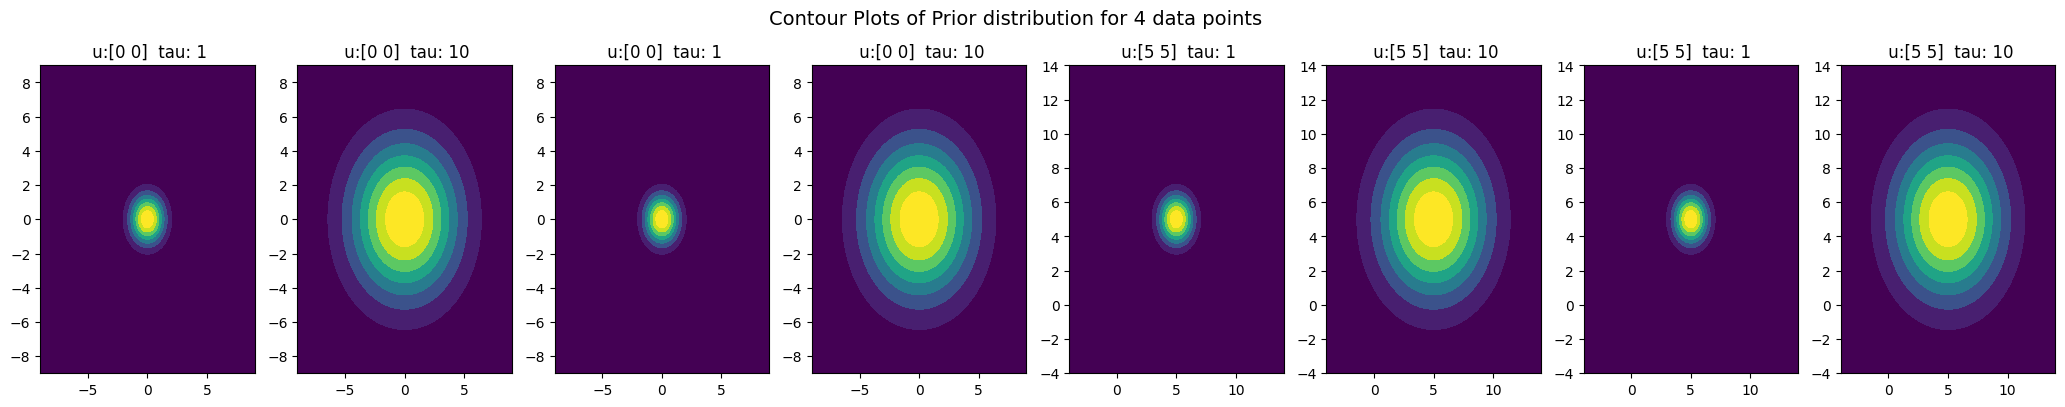

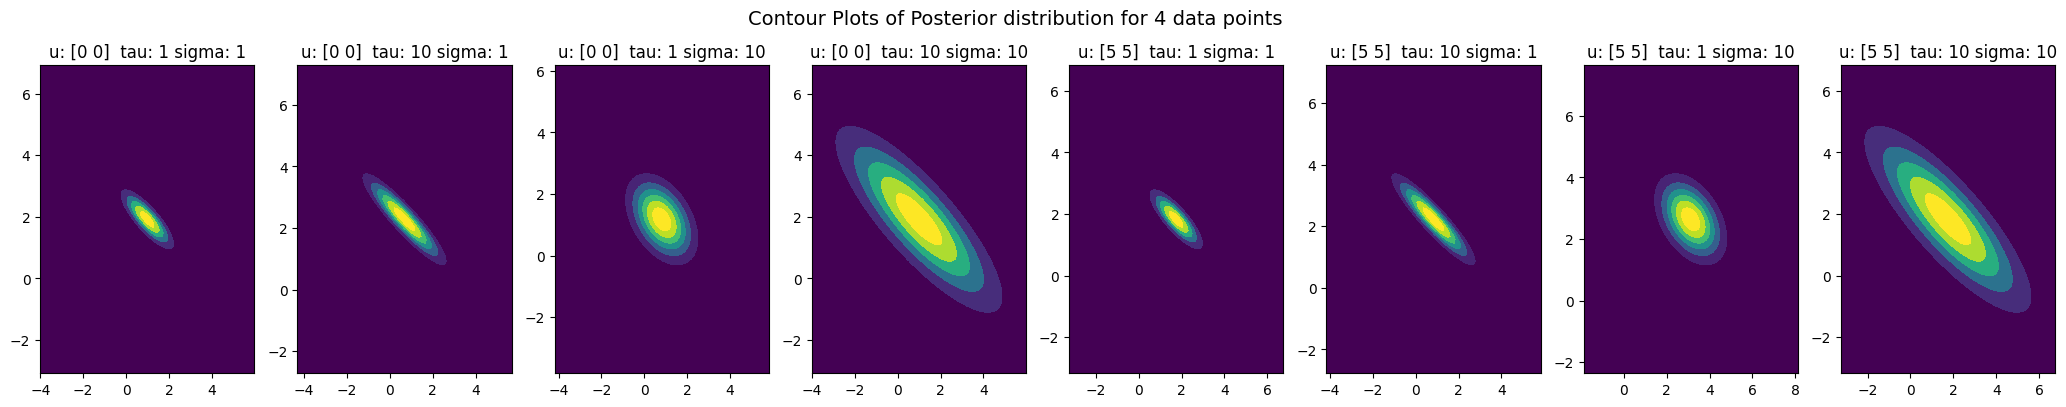

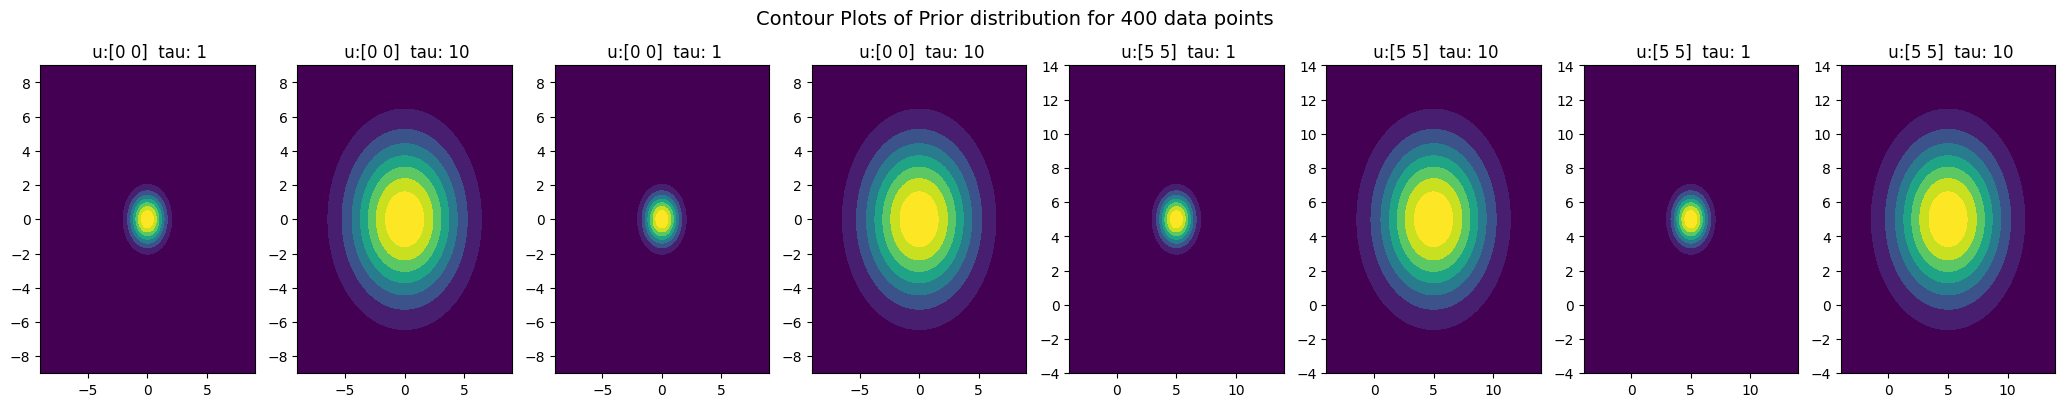

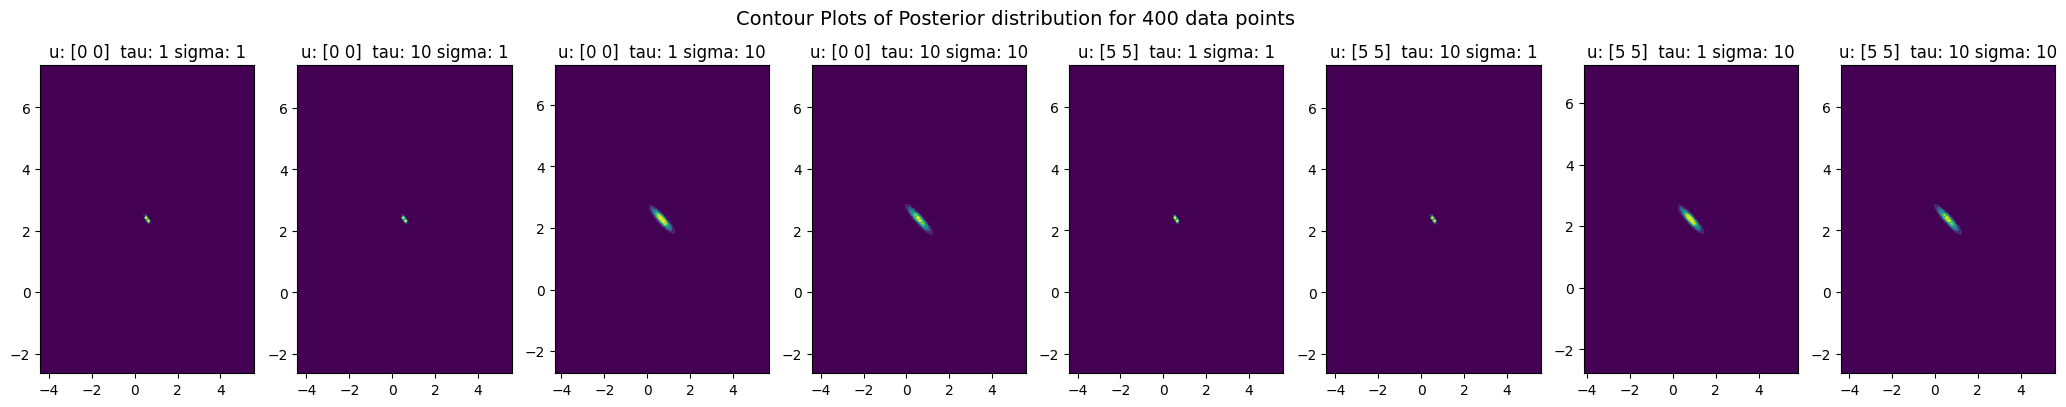

In [15]:
# Cell type : CodeWrite


def plot_prior(u, cov):
    cov_var_inv = np.linalg.inv(cov)  # Calculate the inverse of the covariance matrix
    w1 = np.linspace(-9 + u[0], 9 + u[0], 100)
    w2 = np.linspace(-9 + u[1], 9 + u[1], 100)
    X, Y = np.meshgrid(w1, w2)
    W = np.vstack((X.flatten(), Y.flatten())).T
    Z = []
    for i in range(len(W)):
        z = 1 / (2 * np.pi * np.sqrt(np.linalg.det(cov))) * np.exp((-1 / 2) * np.matmul(np.matmul((W[i] - u), cov_var_inv), (W[i] - u).T))
        Z.append(z)
    Z = np.array(Z)
    Z = Z.reshape(100,100)
    plt.contourf(X, Y, Z, cmap='viridis', extend='both')

def plot_posterior(X_train,Y_train,tau2,sigma2,u):
  cov_inv = np.matmul(np.transpose(X_train),X_train)/sigma2 +1/tau2*np.eye(2)
  cov = np.linalg.inv(cov_inv)
  mat = np.matmul(np.transpose(X_train), Y_train)/sigma2 + u/tau2
  u_p = np.matmul(cov, mat)
  w1 = np.linspace(-5 + u_p[0], 5 + u_p[0], 100)
  w2 = np.linspace(-5 + u_p[1], 5 + u_p[1], 100)
  X, Y = np.meshgrid(w1, w2)
  W = np.vstack((X.flatten(), Y.flatten())).T
  Z = []
  for i in range(len(W)):
      z = 1 / (2 * np.pi * np.sqrt(np.linalg.det(cov))) * np.exp((-1 / 2) * np.matmul(np.matmul((W[i] - u_p), cov_inv), (W[i] - u_p).T))
      Z.append(z)
  Z = np.array(Z)
  Z = Z.reshape(100,100)
  plt.contourf(X, Y, Z, cmap='viridis', extend='both')


u = np.array([[0, 0], [0, 0], [0, 0], [0, 0], [5, 5], [5, 5], [5, 5], [5, 5]])
tau = np.array([1, 10, 1, 10, 1, 10, 1, 10])
sigma = np.array([1,1,10,10,1,1,10,10])
X_train = np.array([[1.0, 2.0],
                   [2.0, 2.1],
                   [0.6, 1.5],
                   [1.1, 0.9]])
Y_train = np.array([5.1, 6.1, 4.2, 2.9])
Y2_train = np.repeat([5.1, 6.1, 4.2, 2.9], 100, axis=0)
X1 = np.repeat([[1.0, 2.0]], 100, axis=0)
X2 = np.repeat([[2.0, 2.1]], 100, axis=0)
X3 = np.repeat([[0.6, 1.5]], 100, axis=0)
X4 = np.repeat([[1.1, 0.9]], 100, axis=0)
X2_train = np.concatenate((X1, X2, X3, X4), axis=0)

#print(np.matmul(np.transpose(X_train), Y_train))
plt.figure(figsize=(26,4))
for i in range(len(u)):
    title = f" u:{u[i]}  tau: {tau[i]}"
    plt.subplot(1, 8, i + 1)
    plot_prior(u[i], tau[i]*np.eye(2))
    plt.title(title)
    plt.suptitle('Contour Plots of Prior distribution for 4 data points', fontsize=14, y=1.02)
plt.show()

plt.figure(figsize=(26,4))
for i in range(len(u)):
    title = f"u: {u[i]}  tau: {tau[i]} sigma: {sigma[i]}"
    plt.subplot(1, 8, i + 1)
    plot_posterior(X_train, Y_train, tau[i], sigma[i],u[i])
    #plt.colorbar()
    plt.title(title)
    plt.suptitle('Contour Plots of Posterior distribution for 4 data points', fontsize=14, y=1.02)
plt.show()

plt.figure(figsize=(26,4))
for i in range(len(u)):
    title = f" u:{u[i]}  tau: {tau[i]}"
    plt.subplot(1, 8, i + 1)
    plot_prior(u[i], tau[i]*np.eye(2))
    plt.title(title)
    plt.suptitle('Contour Plots of Prior distribution for 400 data points', fontsize=14, y=1.02)
plt.show()

plt.figure(figsize=(26,4))
for i in range(len(u)):
    title = f"u: {u[i]}  tau: {tau[i]} sigma: {sigma[i]}"
    plt.subplot(1, 8, i + 1)
    plot_posterior(X2_train, Y2_train, tau[i], sigma[i],u[i])
    #plt.colorbar()
    plt.title(title)
    plt.suptitle('Contour Plots of Posterior distribution for 400 data points', fontsize=14, y=1.02)
plt.show()



** Cell type : TextWrite **

**Observations**
1. The posterior distribution is also a Gaussian distribution.

2. We can see that when $\tau^2$ is greater than $\sigma^2$, the posterior distribution is quite different from the prior distribution, as it depends more strongly on the observed data.

3. As the no of datapoints increases, the contour plots are getting concentrated around the mean

**Cell type : TextRead**

# 5. Logistic Regression

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set).

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [16]:
# CodeWrite
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here


def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0.,
                                   kernel_param=1., num_iter_gd=100):
    # """
    # Arguments:
    # X : (n,d) shape numpy array
    # Y : (n,)  shape numpy array
    # X_test : (m,d) shape numpy array
    # kernel = 'linear' or 'rbf' or 'poly'
    # reg_param = $\lambda$
    # num_iter_gd = number of GD iterations.

    # Returns the result of kernel logistic regression :
    # alpha: Vector of solutions for the dual. Numpy array of shape (n,)

    # Primal problem:
    # $ \min_w  \sum_{i=1}^n \log(1+\exp(-y_i* \w^\top \phi(\x_i)))  + \frac{\lambda}{2} ||\w||^2 $

    # the dual of which is

    # $ \min_alpha \sum_{i=1}^n \log(1+\exp(-y_i* \alpha^\top K_{:,i} ))  + \frac{\lambda}{2} \alpha^\top K \alpha $
    # where $\phi$ is the feature got by the kernel.

    # Where K is the nxn kernel matrix computed on the training data.

    # The kernel is defined by the kernel_param:
    # If kernel=linear: K(\u,\v) = \u^\top \v
    # If kernel=poly:  K(\u,\v) = (1+\u^\top \v)^(kernel_param)
    # If kernel=rbf:  K(\u,\v) = \exp(-kernel_param*||\u-\v||^2)
    # """
    n, d = X.shape
    alpha = np.zeros(n)

    if kernel == 'linear':
      def kernel_func(x1, x2):
        return np.dot(x1, x2)
    elif kernel == 'poly':
      def kernel_func(x1, x2):
        if 1 + np.dot(x1, x2) < 0:
          return 0
        return np.power((1 + np.dot(x1, x2)), kernel_param)
    elif kernel == 'rbf':
      def kernel_func(x1, x2):
        return np.exp(-kernel_param * np.linalg.norm(x1 - x2)**2)
    else:
      raise ValueError("Unsupported kernel type: {}".format(kernel))

    K = np.zeros((n, n))
    for i in range(n):
      for j in range(i, n):
        K[i, j] = kernel_func(X[i], X[j])
        K[j, i] = K[i, j]


    def sigmoid(u):
      return 1/(1+np.exp(-u))

    learning_rate = 0.01
    p = 0
    for i in range(n):
      s = float(-Y[i]*np.dot(alpha.T,K[:,i]))
      p += 1/(1+np.exp(-s))*(-Y[i]*K[:,i])

    gradient = p + reg_param*np.matmul(alpha, K)
    for j in range(num_iter_gd):
      alpha = alpha - learning_rate*gradient

    return alpha

def logistic_regression_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    """
    Return the predictions on test_X using the learnt alphas
    """
    n1 = train_X.shape[0]
    n2 = test_X.shape[0]
    K = np.zeros([n1, n2])

    if kernel == 'linear':
      def kernel_func(x1, x2):
        return np.dot(x1, x2)
    elif kernel == 'poly':
      def kernel_func(x1, x2):
        if 1 + np.dot(x1, x2) < 0:
          return 0
        return np.power((1 + np.dot(x1, x2)),kernel_param)
    elif kernel == 'rbf':
      def kernel_func(x1, x2):
        return np.exp(-kernel_param * np.linalg.norm(x1 - x2)**2)
    else:
      raise ValueError("Unsupported kernel type: {}".format(kernel))

    for i in range(n1):
      for j in range(n2):
        K[i, j] = kernel_func(train_X[i], test_X[j])


    pred_Y = np.sign(np.matmul(alpha,K))
    return pred_Y


In [ ]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below.


kernel_param = np.logspace(-4, 3, 8)
reg_param = np.logspace(-4, 3, 8)
## run this for hyperparameter tuning
# def evaluate_model(X_train, Y_train, X_test, Y_test, kernel, kernel_param, lamda, num_iter_gd = 100):
#   alpha = train_pred_logistic_regression(X_train, Y_train, kernel, lamda, kernel_param, num_iter_gd=100)
#   Y_pred = logistic_regression_pred(alpha, X_train, Y_train, X_test, kernel, kernel_param)
#   accuracy = np.mean(Y_pred == Y_test)
#   return accuracy

# def best_param(X_train, Y_train, X_test,Y_test, kernel, num_iter_gd = 100):

#   best_kernel = 0

#   best_lamda = 0
#   best_accuracy = 0.0

#   for k in kernel_param:
#     for lamda in reg_param:
#       accuracy = evaluate_model(X_train, Y_train, X_test, Y_test, kernel, k, lamda, num_iter_gd)
#       if accuracy > best_accuracy:
#         best_kernel = k
#         best_lamda = lamda
#         best_accuracy = accuracy

#   return best_kernel, best_lamda

# dataA = np.load('Data/dataset_A.npz')
# X_trainA, Y_trainA, X_testA, Y_testA = dataA['arr_0'],dataA['arr_1'],dataA['arr_2'],dataA['arr_3']
# X_validationA = X_trainA[:200,:]
# Y_validationA = Y_trainA[:200]
# klA, best_lamda_linA = best_param(X_trainA, Y_trainA, X_validationA,Y_validationA,'linear', 100)
# best_k_polyA, best_lamda_ployA = best_param(X_trainA, Y_trainA, X_validationA,Y_validationA,'poly', 100)
# best_k_rbfA, best_lamda_rbfA = best_param(X_trainA, Y_trainA, X_validationA,Y_validationA,'rbf', 100)
# best_param_A = np.array([[0, best_lamda_linA],[best_k_polyA, best_lamda_ployA],[best_k_rbfA, best_lamda_rbfA]])
# print(best_param_A)

# dataB = np.load('Data/dataset_B.npz')
# X_trainB, Y_trainB, X_testB, Y_testB = dataB['arr_0'],dataB['arr_1'],dataB['arr_2'],dataB['arr_3']
# X_validationB = X_trainB[:200,:]
# Y_validationB = Y_trainB[:200].reshape(-1,1)
# klB, best_lamda_linB = best_param(X_trainB, Y_trainB, X_validationB,Y_validationB,'linear', 100)
# best_k_polyB, best_lamda_ployB = best_param(X_trainB, Y_trainB, X_validationB,Y_validationB,'poly', 100)
# best_k_rbfB, best_lamda_rbfB = best_param(X_trainB, Y_trainB, X_validationB,Y_validationB,'rbf', 100)
# best_param_B = np.array([[0, best_lamda_linB],[best_k_polyB, best_lamda_ployB],[best_k_rbfB, best_lamda_rbfB]])

# dataC = np.load('Data/dataset_C.npz')
# X_trainC, Y_trainC, X_testC, Y_testC = dataC['arr_0'],dataC['arr_1'],dataC['arr_2'],dataC['arr_3']
# X_validationC = X_trainC[:200,:]
# Y_validationC = Y_trainC[:200].reshape(-1,1)
# KlC, best_lamda_linC = best_param(X_trainC, Y_trainC, X_validationC,Y_validationC,'linear', 100)
# best_k_polyC, best_lamda_ployC = best_param(X_trainC, Y_trainC, X_validationC,Y_validationC,'poly', 100)
# best_k_rbfC, best_lamda_rbfC = best_param(X_trainC, Y_trainC, X_validationC,Y_validationC,'rbf', 100)
# best_param_C = np.array([[0, best_lamda_linC],[best_k_polyC, best_lamda_ployC],[best_k_rbfC, best_lamda_rbfC]])

# dataD = np.load('Data/dataset_D.npz')
# X_trainD, Y_trainD, X_testD, Y_testD = dataD['arr_0'],dataD['arr_1'],dataD['arr_2'],dataD['arr_3']
# X_validationD = X_trainD[:200,:]
# Y_validationD = Y_trainD[:200].reshape(-1,1)
# klD, best_lamda_linD = best_param(X_trainD, Y_trainD, X_validationD,Y_validationD,'linear', 100)
# best_k_polyD, best_lamda_ployD = best_param(X_trainD, Y_trainD, X_validationD,Y_validationD,'ploy', 100)
# best_k_rbfD, best_lamda_rbfD = best_param(X_trainD, Y_trainD, X_validationD,Y_validationD,'rbf', 100)
# best_param_D = np.array([[0, best_lamda_linD],[best_k_polyD, best_lamda_ployD],[best_k_rbfD, best_lamda_rbfD]])

train_err_A = np.zeros(3)
test_err_A = np.zeros(3)
train_err_B = np.zeros(3)
test_err_B = np.zeros(3)
train_err_C = np.zeros(3)
test_err_C = np.zeros(3)
train_err_D = np.zeros(3)
test_err_D = np.zeros(3)

dataA = np.load('Data/dataset_A.npz')
X_trainA, Y_trainA, X_testA, Y_testA = dataA['arr_0'],dataA['arr_1'],dataA['arr_2'],dataA['arr_3']
dataB = np.load('Data/dataset_B.npz')
X_trainB, Y_trainB, X_testB, Y_testB = dataB['arr_0'],dataB['arr_1'],dataB['arr_2'],dataB['arr_3']
dataC = np.load('Data/dataset_C.npz')
X_trainC, Y_trainC, X_testC, Y_testC = dataC['arr_0'],dataC['arr_1'],dataC['arr_2'],dataC['arr_3']
dataD = np.load('Data/dataset_D.npz')
X_trainD, Y_trainD, X_testD, Y_testD = dataD['arr_0'],dataD['arr_1'],dataD['arr_2'],dataD['arr_3']



lamda_A = np.array([10**-4, 10**-3, 10**-4])
k_A = np.array([1,3,1])

lamda_B = np.array([1, 10**-3, 10**-3])
k_B = np.array([1,2,4])

lamda_C = np.array([10**-4, 10**-4, 10**-4])
k_C = np.array([1,10**-4,10**-3])

lamda_D = np.array([10**-4, 10**-4, 10**-4])
k_D = np.array([1,10**-4,10**-2])

kernel_mat = np.array(['linear','poly','rbf'])

for i in range(3):
  alpha = train_pred_logistic_regression(X_trainA, Y_trainA, kernel=kernel_mat[i], reg_param=lamda_A[i], kernel_param=k_A[i], num_iter_gd=100)
  Y_train_pred = logistic_regression_pred(alpha, X_trainA, Y_trainA, X_trainA, kernel_mat[i], k_A[i])
  Y_test_pred = logistic_regression_pred(alpha, X_trainA, Y_trainA, X_testA, kernel_mat[i], k_A[i])
  train_err_A[i] = len(Y_trainA[Y_trainA!=Y_train_pred])
  test_err_A[i] = len(Y_testA[Y_testA!=Y_test_pred])

for i in range(3):
  alpha = train_pred_logistic_regression(X_trainB, Y_trainB, kernel=kernel_mat[i], reg_param=lamda_B[i], kernel_param=k_B[i], num_iter_gd=100)
  Y_train_pred = logistic_regression_pred(alpha, X_trainB, Y_trainB, X_trainB, kernel_mat[i], k_B[i])
  Y_test_pred = logistic_regression_pred(alpha, X_trainB, Y_trainB, X_testB, kernel_mat[i], k_B[i])
  train_err_B[i] = len(Y_trainB[Y_trainB!=Y_train_pred])/len(Y_trainB)
  test_err_B[i] = len(Y_testB[Y_testB!=Y_test_pred])/len(Y_testB)

for i in range(3):
  alpha = train_pred_logistic_regression(X_trainC, Y_trainC, kernel=kernel_mat[i], reg_param=lamda_C[i], kernel_param=k_C[i], num_iter_gd=100)
  Y_train_pred = logistic_regression_pred(alpha, X_trainC, Y_trainC, X_trainC, kernel_mat[i], k_C[i])
  Y_test_pred = logistic_regression_pred(alpha, X_trainC, Y_trainC, X_testC, kernel_mat[i], k_C[i])
  train_err_C[i] = len(Y_trainC[Y_trainC!=Y_train_pred])/len(Y_trainC)
  test_err_C[i] = len(Y_testC[Y_testC!=Y_test_pred])/len(Y_testC)

for i in range(3):
  alpha = train_pred_logistic_regression(X_trainD, Y_trainD, kernel=kernel_mat[i], reg_param=lamda_D[i], kernel_param=k_D[i], num_iter_gd=100)
  Y_train_pred = logistic_regression_pred(alpha, X_trainD, Y_trainD, X_trainD, kernel_mat[i], k_D[i])
  Y_test_pred = logistic_regression_pred(alpha, X_trainD, Y_trainD, X_testD, kernel_mat[i], k_D[i])
  train_err_D[i] = len(Y_trainD[Y_trainD!=Y_train_pred])/len(Y_trainD)
  test_err_D[i] = len(Y_testD[Y_testD!=Y_test_pred])/len(Y_testD)



# print(train_err_A,test_err_A)
# print(train_err_B,test_err_B)
# print(train_err_C,test_err_C)
# print(train_err_D,test_err_D)


TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  
Percentage errors are shown below.

For linear kernel :

Dataset | Regularisation parameter | Train zero-one error | Test zero-one error
--- |--- |--- |---
A | 0.0001 | 16.67 | 16.0
B | 1 | 18.0 | 20.8
C | 0.0001 | 50.2 | 43.2
D | 0.0001 | 43.25 | 23.07

For poly kernel :

Dataset | Kernel parameter | Regularisation parameter | Train zero-one error | Test zero-one error
--- |--- | --- |--- |---
A | 3 | 0.001 | 14 | 14.5
B |2 | 0.001 | 15.5 | 16
C |0.0001 | 0.0001 | 49.7 | 48.6
D |0.0001 | 0.0001 | 43.2 | 23.1

For rbf kernel :

Dataset | Kernel parameter | Regularisation parameter | Train zero-one error | Test zero-one error
--- |--- | --- |--- |---
A | 1 | 0.0001 | 0.3 | 0.6
B | 4 | 0.001 | 15.5 | 17
C | 0.001 | 0.0001 | 0 | 2.6
D | 0.01 | 0.0001 | 0 | 8.3


**Observations:**

Dataset A:
- This dataset needs a curved boundary to separate its classes, making a straight line (linear kernel) perform poorly compared to other options.
- The RBF kernel, which can learn complex curved boundaries, resulted in low train and test errors.
- Odd-degree polynomials performed significantly better than even-degree ones, as the boundary shape resembled an odd function.

Dataset B:
- A straight boundary works best for this dataset, so all kernel types perform similarly.
- Among polynomials, degree 1 performed the best, while other degrees often performed worse.
- Finding the optimal solution was challenging due to the intermixing of data points from different classes.

Dataset C:
- Non-linear boundaries performed better here, indicating that the data cannot be separated by a straight line in its 64-dimensional space.

Dataset D:
- Linear and polynomial kernels had similar performance on this dataset.



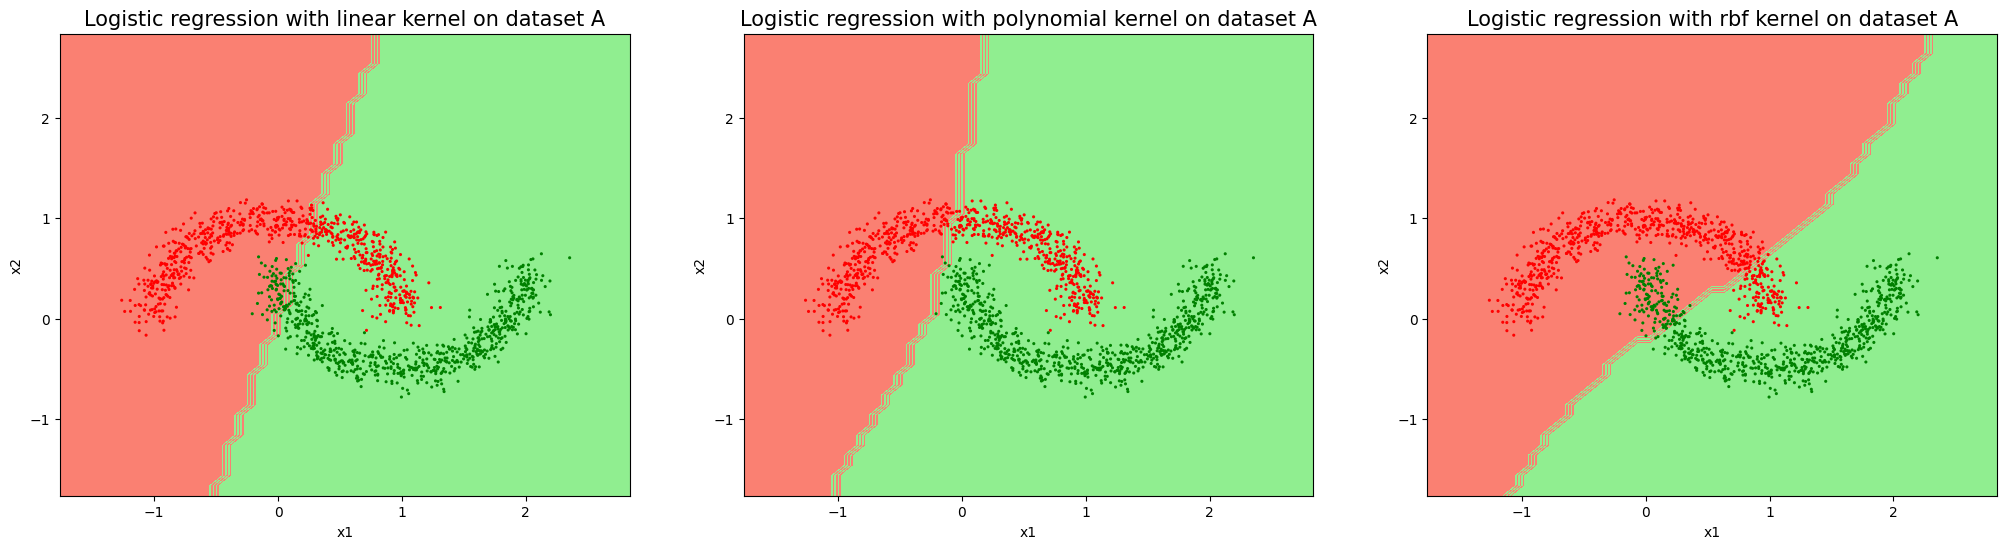

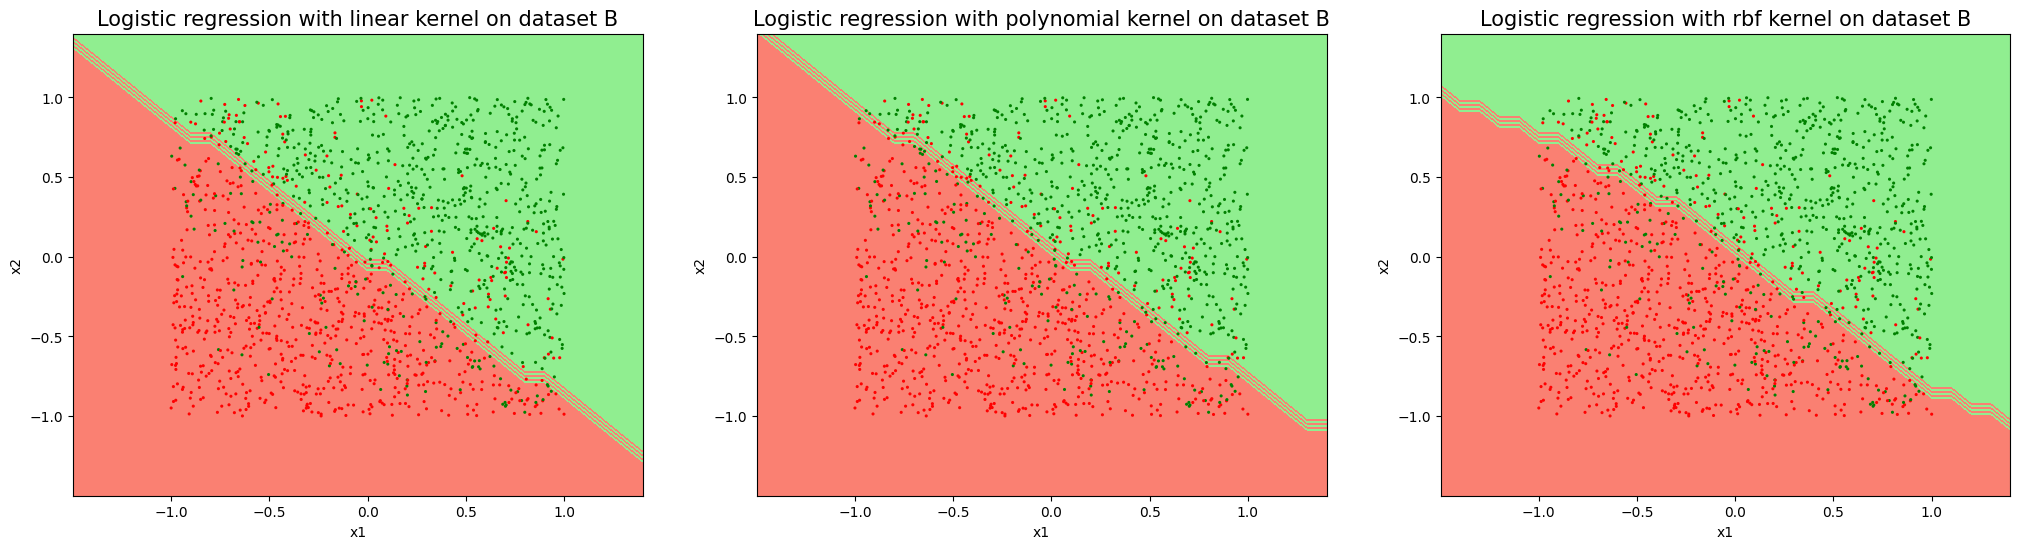

In [18]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6


def Plotregression(X_train, Y_train, kernel,reg_param,kernel_param,num_iter_gd,dataset):
    x1_train = X_train[:, 0]
    x2_train = X_train[:, 1]
    X_min = min(min(X_train[:,0]),min(X_train[:,1]))
    X_max = max(max(X_train[:,0]),max(X_train[:,1]))

    X_test = []
    col = []
    for i in range(len(X_train)):
        if Y_train[i] == 1:
            col.append("green")
        else:
            col.append("red")

    x1 = np.arange(X_min-0.5, X_max+0.5, 0.1)
    x2 = np.arange(X_min-0.5, X_max+0.5, 0.1)

    X, Y = np.meshgrid(x1, x2)

    for i in range(len(x1)):
        for j in range(len(x2)):
            X_test.append([X[i][j], Y[i][j]])

    X_test = np.array(X_test)

    if kernel == 'linear':
        alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param=lamda_A[0], kernel_param=kernel_param[0], num_iter_gd=100)
        z_test = logistic_regression_pred(alpha, X_train, Y_train, X_test, kernel, kernel_param[0])
        # plt.figure(figsize =(14,4))
        # plt.subplot(1, 3, 1)
        title = "Logistic regression with linear kernel on dataset " + dataset
    elif kernel == "poly":
        alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param=lamda_A[1], kernel_param=kernel_param[1], num_iter_gd=100)
        z_test = logistic_regression_pred(alpha, X_train, Y_train, X_test, kernel, kernel_param[1])
        # plt.figure(figsize =(14,4))
        # plt.subplot(1, 3, 2)
        title = "Logistic regression with polynomial kernel on dataset " + dataset
    else:
        alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param=lamda_A[2], kernel_param=kernel_param[2], num_iter_gd=100)
        z_test = logistic_regression_pred(alpha, X_train, Y_train, X_test, kernel, kernel_param[2])
        # plt.figure(figsize =(14,4))
        # plt.subplot(1, 3, 3)
        title = "Logistic regression with rbf kernel on dataset " + dataset
   # print(z_test.shape)
    Z = z_test.reshape(X.shape)
    plt.contourf(X, Y, Z, colors=['salmon', 'lightgreen'])
    #for i in range(len(x1_train)):
       # plt.scatter(x1_train[i], x2_train[i], c=col[i], s=5, linewidth=0)
    plt.scatter(x1_train, x2_train, c=col, s=5, linewidth=0)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title,fontsize = 15)

dataA = np.load('Data/dataset_A.npz')
X_trainA, Y_trainA, X_testA, Y_testA = dataA['arr_0'],dataA['arr_1'],dataA['arr_2'],dataA['arr_3']
dataB = np.load('Data/dataset_B.npz')
X_trainB, Y_trainB, X_testB, Y_testB = dataB['arr_0'],dataB['arr_1'],dataB['arr_2'],dataB['arr_3']
dataC = np.load('Data/dataset_C.npz')
X_trainC, Y_trainC, X_testC, Y_testC = dataC['arr_0'],dataC['arr_1'],dataC['arr_2'],dataC['arr_3']
dataD = np.load('Data/dataset_D.npz')
X_trainD, Y_trainD, X_testD, Y_testD = dataD['arr_0'],dataD['arr_1'],dataD['arr_2'],dataD['arr_3']

lamda_A = np.array([10**-4, 10**-3, 10**-4])
k_A = np.array([1,3,1])

lamda_B = np.array([1, 10**-3, 10**-3])
k_B = np.array([1,2,4])

kernel_mat = np.array(['linear','poly','rbf'])

plt.figure(figsize=(25, 6))

for i, k in enumerate(kernel_mat, start=1):
    plt.subplot(1, 3, i)
    Plotregression(X_trainA, Y_trainA, k, lamda_A, k_A, 100, 'A')

plt.show()

plt.figure(figsize=(25, 6))

for i, k in enumerate(kernel_mat, start=1):
    plt.subplot(1, 3, i)
    Plotregression(X_trainB, Y_trainB, k, lamda_B, k_B, 100, 'B')

plt.show()


**Cell type : TextRead**

# 6. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [195]:

def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy'):
    """ Returns a decision tree trained on X and Y.
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """
    tree ={}
    init_val = -1
    tree[0] = [init_val]*3
    split_node_dec(tree, 0, X, Y, 0, num_nodes_stop, criterion)
    return tree

def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and
    returns the tree predicted values at those instances."""
    n = test_X.shape[0]
    Y_pred = np.zeros(n)
    for i in range(n):
        Y_pred[i] = pred_class(tree, 0, test_X[i])
    return Y_pred

neg = 0
pos = 0

def split_node_dec(tree, node_pos, X, Y, depth, num_nodes_stop=1, criterion = 'accuracy', stop_depth = 1e7):
    global neg, pos
    n,d = X.shape
    total_neg = np.sum((Y==-1))
    total_pos = np.sum((Y==1))
    one_class = False
    if total_pos == 0 or total_pos == n:
        one_class = True
    if n <= num_nodes_stop or depth >= stop_depth or ((pos == total_pos) and (neg == total_neg)) or one_class:
        if total_pos > total_neg:
            class_pred = 1
        else:
            class_pred = -1
        tree[node_pos] = [-1,-1, class_pred]
        return

    neg = total_neg
    pos = total_pos
    best_feat = 0
    best_thresh = 0
    best_acc = -np.inf

    for feat in range(d):
        ids = X[:,feat].argsort()
        X = X[ids]
        Y = Y[ids]
        min_feat = X[0][feat]
        max_feat = X[-1][feat]
        ### check here
        num_pts  = 11
        iter = max_feat - min_feat
        iter = iter/num_pts
        for pt in range(1, num_pts):
            thresh = min_feat + pt*iter
            pos_l = 0
            left = 0
            for sample in range(n):
                if X[sample][feat] <= thresh:
                    left+=1
                    if Y[sample]>0:
                        pos_l+=1
            pos_r = total_pos - pos_l
            right = n - left
            dec = split_dec(criterion, pos_l, left, pos_r, right)
            if dec >= best_acc:
                best_acc = dec
                best_feat = feat
                best_thresh = thresh
    X_left = X[X[:, best_feat] <= best_thresh]
    Y_left = Y[X[:, best_feat] <= best_thresh]
    X_right = X[X[:, best_feat] > best_thresh]
    Y_right = Y[X[:, best_feat] > best_thresh]
    tree[node_pos] = [best_feat, best_thresh, 0]
    split_node_dec(tree, 2*node_pos+1, X_left, Y_left, depth+1, num_nodes_stop, criterion, stop_depth)
    split_node_dec(tree, 2*node_pos+2, X_right, Y_right, depth+1, num_nodes_stop, criterion, stop_depth)
    return

def split_dec(criterion, pos_l, left, pos_r, right):
    if criterion == 'accuracy':
        val = (pos_l + right - pos_r)/(left+right)
        return max(val, 1-val)
    elif criterion == 'entropy':
        p_l = left/(left+right)
        h_l = h_func(pos_l/(left+1e-40))
        p_r = 1 - p_l
        h_r = h_func(pos_r/(right+1e-40))
        return (p_l*h_l + p_r*h_r)

def h_func(x):
    if x == 0 or x == 1:
        return 0
    return x*np.log2(x) + (1-x)*np.log2(1-x)

def pred_class(tree, node_pos, sample):
    if tree[node_pos][0] == -1:
        return tree[node_pos][2]
    loc = tree[node_pos][0]
    thresh = tree[node_pos][1]
    if sample[loc] <= thresh:
        return pred_class(tree, 2*node_pos+1, sample)
    else:
        return pred_class(tree, 2*node_pos+2, sample)

In [198]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below.
# Repeat with criterion set to entropy also.
def find_best_hyperparameters_acc(X_train, Y_train, validation_ratio=0.2, num_nodes_stop_range=[1, 2, 4, 8, 16, 32, 64, 128, 256]):
    best_hyperparameters = {}
    best_accuracy = 0

    num_validation = int(validation_ratio * len(Y_train))
    X_train_split = X_train[:-num_validation]
    Y_train_split = Y_train[:-num_validation]
    X_validation = X_train[-num_validation:]
    Y_validation = Y_train[-num_validation:]


    # start, end = num_nodes_stop_range

    for num_nodes_stop in [1, 2, 4, 8, 16, 32, 64, 128, 256]:

        tree = train_decision_tree(X_train_split, Y_train_split, num_nodes_stop=num_nodes_stop)
        Y_pred = eval_decision_tree(tree, X_validation)
        accuracy = np.mean(Y_pred == Y_validation)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameters = num_nodes_stop

    return best_hyperparameters

def find_best_hyperparameters_ent(X_train, Y_train, validation_ratio=0.2, num_nodes_stop_range=[1, 2, 4, 8, 16, 32, 64, 128, 256]):
    best_hyperparameters = {}
    best_accuracy = 0

    num_validation = int(validation_ratio * len(Y_train))
    X_train_split = X_train[:-num_validation]
    Y_train_split = Y_train[:-num_validation]
    X_validation = X_train[-num_validation:]
    Y_validation = Y_train[-num_validation:]


    for num_nodes_stop in [1, 2, 4, 8, 16, 32, 64, 128, 256]:

        tree = train_decision_tree(X_train_split, Y_train_split, num_nodes_stop=num_nodes_stop,criterion='entropy')
        Y_pred = eval_decision_tree(tree, X_validation)

        accuracy = np.mean(Y_pred == Y_validation)


        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameters = num_nodes_stop

    return best_hyperparameters

dataA = np.load('Data/dataset_A.npz')
X_trainA, Y_trainA, X_testA, Y_testA = dataA['arr_0'],dataA['arr_1'],dataA['arr_2'],dataA['arr_3']
dataB = np.load('Data/dataset_B.npz')
X_trainB, Y_trainB, X_testB, Y_testB = dataB['arr_0'],dataB['arr_1'],dataB['arr_2'],dataB['arr_3']
dataC = np.load('Data/dataset_C.npz')
X_trainC, Y_trainC, X_testC, Y_testC = dataC['arr_0'],dataC['arr_1'],dataC['arr_2'],dataC['arr_3']
dataD = np.load('Data/dataset_D.npz')
X_trainD, Y_trainD, X_testD, Y_testD = dataD['arr_0'],dataD['arr_1'],dataD['arr_2'],dataD['arr_3']

node_stop_A_acc = find_best_hyperparameters_acc(X_trainA, Y_trainA)
node_stop_B_acc = find_best_hyperparameters_acc(X_trainB, Y_trainB)
node_stop_C_acc = find_best_hyperparameters_acc(X_trainC, Y_trainC)
node_stop_D_acc = find_best_hyperparameters_acc(X_trainD, Y_trainD)

node_stop_A_ent = find_best_hyperparameters_ent(X_trainA, Y_trainA)
node_stop_B_ent = find_best_hyperparameters_ent(X_trainB, Y_trainB)
node_stop_C_ent = find_best_hyperparameters_ent(X_trainC, Y_trainC)
node_stop_D_ent = find_best_hyperparameters_ent(X_trainD, Y_trainD)

# print(node_stop_A_acc, node_stop_B_acc, node_stop_C_acc, node_stop_D_acc)
# print(node_stop_A_ent, node_stop_B_ent, node_stop_C_ent, node_stop_D_ent)

def findzeroerror(Y1,Y2):
  return len(Y2[Y2!=Y1])/len(Y2)


tree = train_decision_tree(X_trainA, Y_trainA, num_nodes_stop=node_stop_A_acc,criterion='accuracy')
#tree2 = train_decision_tree(X_trainA, Y_trainA, num_nodes_stop=node_stop_A_ent,criterion='entropy')
Y_pred_trainA = eval_decision_tree(tree, X_trainA)
Y_pred_testA = eval_decision_tree(tree, X_testA)
errtrainA_acc = findzeroerror(Y_pred_trainA,Y_trainA)
errtestA_acc = findzeroerror(Y_pred_testA,Y_testA)

tree = train_decision_tree(X_trainA, Y_trainA, num_nodes_stop=node_stop_A_ent,criterion='entropy')
Y_pred_trainA = eval_decision_tree(tree, X_trainA)
Y_pred_testA = eval_decision_tree(tree, X_testA)
errtrainA_ent = findzeroerror(Y_pred_trainA,Y_trainA)
errtestA_ent = findzeroerror(Y_pred_testA,Y_testA)

tree = train_decision_tree(X_trainB, Y_trainB, num_nodes_stop=node_stop_B_acc,criterion='accuracy')
Y_pred_trainB = eval_decision_tree(tree, X_trainB)
Y_pred_testB = eval_decision_tree(tree, X_testB)
errtrainB_acc = findzeroerror(Y_pred_trainB,Y_trainB)
errtestB_acc = findzeroerror(Y_pred_testB,Y_testB)

tree = train_decision_tree(X_trainB, Y_trainB, num_nodes_stop=node_stop_B_ent,criterion='entropy')
Y_pred_trainB = eval_decision_tree(tree, X_trainB)
Y_pred_testB = eval_decision_tree(tree, X_testB)
errtrainB_ent = findzeroerror(Y_pred_trainB,Y_trainB)
errtestB_ent = findzeroerror(Y_pred_testB,Y_testB)

tree = train_decision_tree(X_trainC, Y_trainC, num_nodes_stop=node_stop_C_acc,criterion='accuracy')
Y_pred_trainC = eval_decision_tree(tree, X_trainC)
Y_pred_testC = eval_decision_tree(tree, X_testC)
errtrainC_acc = findzeroerror(Y_pred_trainC,Y_trainC)
errtestC_acc = findzeroerror(Y_pred_testC,Y_testC)

tree = train_decision_tree(X_trainC, Y_trainC, num_nodes_stop=node_stop_C_ent,criterion='entropy')
Y_pred_trainC = eval_decision_tree(tree, X_trainC)
Y_pred_testC = eval_decision_tree(tree, X_testC)
errtrainC_ent = findzeroerror(Y_pred_trainC,Y_trainC)
errtestC_ent = findzeroerror(Y_pred_testC,Y_testC)

tree = train_decision_tree(X_trainD, Y_trainD, num_nodes_stop=node_stop_D_acc,criterion='accuracy')
Y_pred_trainD = eval_decision_tree(tree, X_trainD)
Y_pred_testD = eval_decision_tree(tree, X_testD)
errtrainD_acc = findzeroerror(Y_pred_trainD,Y_trainD)
errtestD_acc = findzeroerror(Y_pred_testD,Y_testD)

tree = train_decision_tree(X_trainD, Y_trainD, num_nodes_stop=node_stop_D_ent,criterion='entropy')
Y_pred_trainD = eval_decision_tree(tree, X_trainD)
Y_pred_testD = eval_decision_tree(tree, X_testD)
errtrainD_ent = findzeroerror(Y_pred_trainD,Y_trainD)
errtestD_ent = findzeroerror(Y_pred_testD,Y_testD)

# print(errtrainA_acc, errtrainB_acc, errtrainC_acc, errtrainD_acc)
# print(errtestA_acc, errtestB_acc, errtestC_acc, errtestD_acc)
# print(errtrainA_ent, errtrainB_ent, errtrainC_ent, errtrainD_ent)
# print(errtestA_ent, errtestB_ent, errtestC_ent, errtestD_ent)


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 classification datasets A,B,C,D. (2 real world and 2 synthetic).  

\
\begin{array}{ |c|c|c|c| }
 \hline
 Dataset &criterion& num~ of ~nodes & Train-zero-error & Test-zero-error \\
 DatasetA &accuracy& 4 & 0.01133 & 0.028 \\
 DatasetA &entropy& 8 & 0.0006 & 0.008 \\
 DatasetB & accuracy& 32 & 0.1613 & 0.216 \\
 DatasetB &entropy& 64 & 0.1613 & 0.214 \\
 DatasetC & accuracy& 64 & 0.1073 & 0.138 \\
 DatasetC &entropy& 1 & 0.0 & 0.0842\\
 DatasetD &accuracy& 16 & 0.0425 & 0.00769 \\
 DatasetD &entropy& 1 & 0.001 & 0.0088 \\
 \hline
\end{array}

**Observations:**

1. Setting the number of nodes to stop at 1 results in the lowest training error, often achieving zero training error. However, this setting tends to overfit the data, leading to suboptimal performance on the validation set.
2. Training error is consistently much lower than test error, indicating that decision trees tend to overfit and are not very stable classifiers.
3. The entropy criterion consistently performs better than the accuracy criterion. This is because the accuracy criterion's discontinuous derivative can cause issues when trying to find the best choice within the search space. The entropy criterion, being differentiable, may yield more accurate results when determining the optimal point.
4. Dataset A seems easy to fit, achieving over 97% accuracy without even using the entire training set.
5. Dataset B benefits from a diagonal separator, which decision trees struggle to model accurately due to their limitations in creating only horizontal or vertical boundaries.
6. The largest difference between accuracy and entropy criteria is observed in Dataset C, where entropy tends to favor splits that result in more pure nodes.
7. Dataset D, suspected to have a hyperplane as a decision boundary, can be closely compared with Dataset B in terms of results.

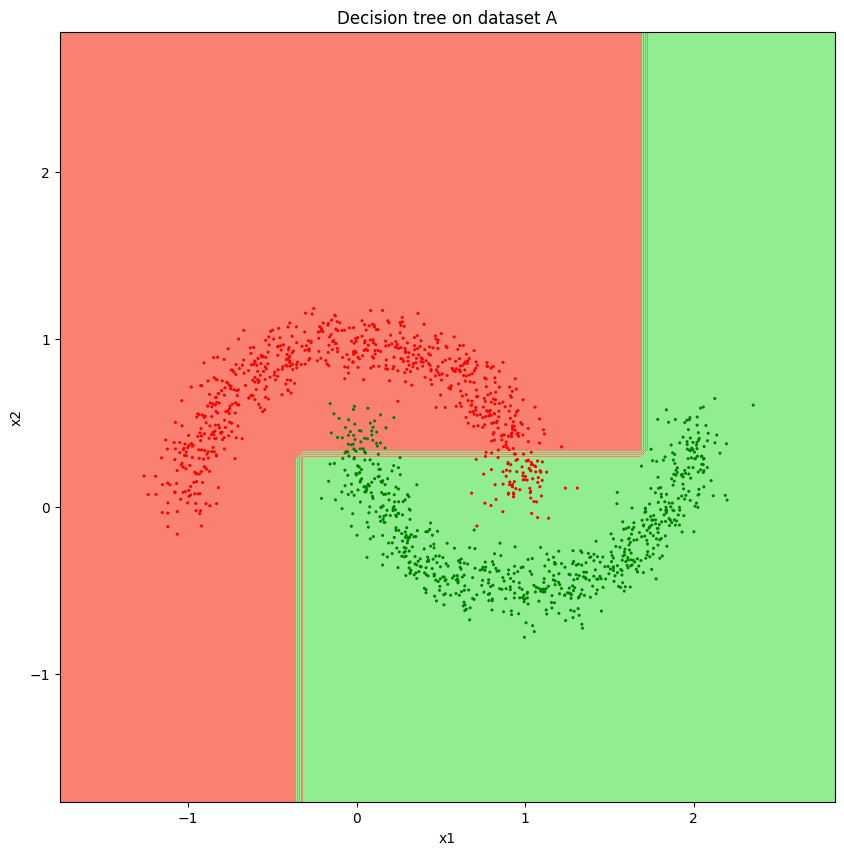

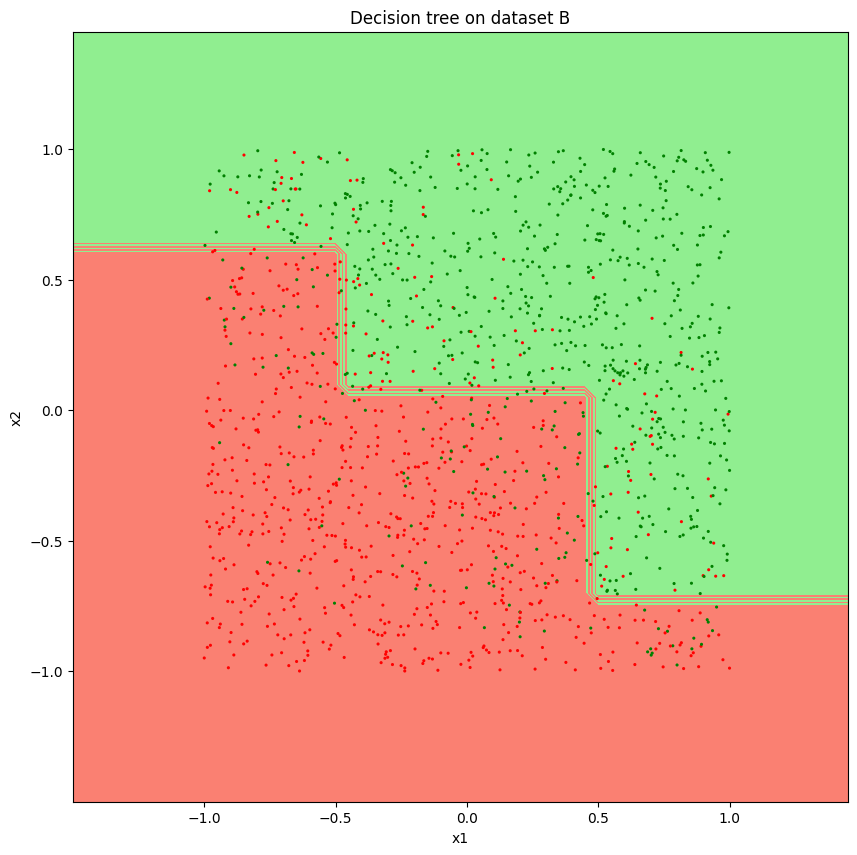

In [197]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2

def xtest(X_train, Y_train):
    x1_train = X_train[:, 0]
    x2_train = X_train[:, 1]
    X_min = min(min(X_train[:,0]),min(X_train[:,1]))
    X_max = max(max(X_train[:,0]),max(X_train[:,1]))

    X_test = []
    col = []
    for i in range(len(X_train)):
        if Y_train[i] == 1:
            col.append("green")
        else:
            col.append("red")

    x1 = np.arange(X_min-0.5, X_max+0.5, 0.05)
    x2 = np.arange(X_min-0.5, X_max+0.5, 0.05)

    X, Y = np.meshgrid(x1, x2)

    for i in range(len(x1)):
        for j in range(len(x2)):
            X_test.append([X[i][j], Y[i][j]])

    X_test = np.array(X_test)
    return X_test, X, Y,col

data_A = np.load('dataset_A.npz')
X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']
X_test,X,Y,col = xtest(X_train, Y_train)
tree = train_decision_tree(X_train, Y_train, num_nodes_stop=100)
z_test = eval_decision_tree(tree, X_test)
plt.figure(figsize=(10,10))
Z = z_test.reshape(X.shape)
plt.contourf(X, Y, Z, colors=['salmon', 'lightgreen'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=col, s=5, linewidth=0)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision tree on dataset A")
plt.show()

data_B = np.load('dataset_B.npz')
X_train, Y_train, X_test, Y_test = data_B['arr_0'],data_B['arr_1'],data_B['arr_2'],data_B['arr_3']
X_test,X,Y,col = xtest(X_train, Y_train)
tree = train_decision_tree(X_train, Y_train, num_nodes_stop=100)
z_test = eval_decision_tree(tree, X_test)
plt.figure(figsize=(10,10))
Z = z_test.reshape(X.shape)
plt.contourf(X, Y, Z, colors=['salmon', 'lightgreen'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=col, s=5, linewidth=0)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision tree on dataset B")
plt.show()



**Cell type : TextRead**


# 7 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [193]:
# CodeWrite cell
# Write Random Forest classifier.

import pandas as pd
from random import randrange
from random import seed

def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1, criterion='accuracy', a=0.5, b=0.5):

    def predict_class(tree, node_pos, sample):

        if tree[node_pos][0] == -1:
            return tree[node_pos][2]
        loc = tree[node_pos][0]
        thresh = tree[node_pos][1]
        if sample[loc] <= thresh:
            return predict_class(tree, 2 * node_pos + 1, sample)
        else:
            return predict_class(tree, 2 * node_pos + 2, sample)

    def train_decision_tree(X, Y, num_nodes_stop, criterion, b):

        tree = {}
        init_val = -1
        tree[0] = [init_val] * 3
        split_node_decision(tree, 0, X, Y, 0, b, num_nodes_stop, criterion)
        return tree

    def split_node_decision(tree, node_pos, X, Y, depth, b, num_nodes_stop=1, criterion='accuracy', stop_depth=1e7):

        global neg, pos
        n, d = X.shape
        total_neg = np.sum((Y == -1))
        total_pos = np.sum((Y == 1))
        one_class = total_pos == 0 or total_pos == n
        if n <= num_nodes_stop or depth >= stop_depth or ((pos == total_pos) and (neg == total_neg)) or one_class:
            class_pred = 1 if total_pos > total_neg else -1
            tree[node_pos] = [-1, -1, class_pred]
            return

        neg = total_neg
        pos = total_pos
        best_feat = 0
        best_thresh = 0
        best_acc = -np.inf
        feats = np.sort(np.random.choice(range(d), int(d * b), replace=False))

        for feat in feats:
            ids = X[:, feat].argsort()
            X = X[ids]
            Y = Y[ids]
            min_feat = X[0][feat]
            max_feat = X[-1][feat]
            num_pts = 11
            iter = (max_feat - min_feat) / num_pts

            for pt in range(1, num_pts):
                thresh = min_feat + pt * iter
                pos_l = np.sum(Y[:pt] == 1)
                left = pt
                pos_r = total_pos - pos_l
                right = n - left
                dec = split_decision(criterion, pos_l, left, pos_r, right)
                if dec >= best_acc:
                    best_acc = dec
                    best_feat = feat
                    best_thresh = thresh

        X_left = X[X[:, best_feat] <= best_thresh]
        Y_left = Y[X[:, best_feat] <= best_thresh]
        X_right = X[X[:, best_feat] > best_thresh]
        Y_right = Y[X[:, best_feat] > best_thresh]
        tree[node_pos] = [best_feat, best_thresh, 0]

        split_node_decision(tree, 2 * node_pos + 1, X_left, Y_left, depth + 1, b, num_nodes_stop, criterion, stop_depth)
        split_node_decision(tree, 2 * node_pos + 2, X_right, Y_right, depth + 1, b, num_nodes_stop, criterion,
                            stop_depth)

    def split_decision(criterion, pos_l, left, pos_r, right):

        if criterion == 'accuracy':
            val = (pos_l + right - pos_r) / (left + right)
            return max(val, 1 - val)
        elif criterion == 'entropy':
            p_l = left / (left + right)
            h_l = h_func(pos_l / (left + 1e-40))
            p_r = 1 - p_l
            h_r = h_func(pos_r / (right + 1e-40))
            return p_l * h_l + p_r * h_r

    def h_func(x):

        if x == 0 or x == 1:
            return 0
        return x * np.log2(x) + (1 - x) * np.log2(1 - x)

    n, d = X.shape
    rf = []
    for i in range(num_trees):
        frac_data = np.sort(np.random.choice(range(n), int(n * a), replace=False))
        rf.append(train_decision_tree(X[frac_data], Y[frac_data], num_nodes_stop, criterion, b))

    return rf

def eval_random_forest(random_forest, test_X):

    def predict_class(tree, node_pos, sample):

        if tree[node_pos][0] == -1:
            return tree[node_pos][2]
        loc = tree[node_pos][0]
        thresh = tree[node_pos][1]
        if sample[loc] <= thresh:
            return predict_class(tree, 2 * node_pos + 1, sample)
        else:
            return predict_class(tree, 2 * node_pos + 2, sample)

    def evaluate_decision_tree(tree, test_X):

        n = test_X.shape[0]
        Y = np.zeros(n)
        for i in range(n):
            Y[i] = predict_class(tree, 0, test_X[i])
        return Y

    m, dim = test_X.shape
    Y_pred = np.zeros(m)
    for tree in random_forest:
        Y_pred += evaluate_decision_tree(tree, test_X)
    return np.sign(Y_pred)





In [ ]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.

def find_best_hyperparameters_acc(X_train, Y_train, validation_ratio=0.2, num_trees=[5, 10,30], num_nodes_stop_range=1):
    best_hyperparameters = []
    best_accuracy = 0

    num_validation = int(validation_ratio * len(Y_train))
    X_train_split = X_train[:-num_validation]
    Y_train_split = Y_train[:-num_validation]
    X_validation = X_train[-num_validation:]
    Y_validation = Y_train[-num_validation:]

    for num_trees in [5, 10, 20, 30, 40, 50, 60, 70,80]:

        tree = train_random_forest(X_train, Y_train, num_trees = num_trees, num_nodes_stop = 1)
        Y_pred = eval_random_forest(tree, X_validation)

        accuracy = np.mean(Y_pred == Y_validation)
        # print(accuracy, num_trees)


        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameters = num_trees

    return best_hyperparameters

def find_best_hyperparameters_ent(X_train, Y_train, validation_ratio=0.3, num_trees=[5, 10,30], num_nodes_stop_range=1):
    best_hyperparameters = []
    best_accuracy = 0

    num_validation = int(validation_ratio * len(Y_train))
    X_train_split = X_train[:-num_validation]
    Y_train_split = Y_train[:-num_validation]
    X_validation = X_train[-num_validation:]
    Y_validation = Y_train[-num_validation:]

    for num_trees in [5, 10, 20, 30, 40, 50, 60, 70,80]:

        tree = train_random_forest(X_train, Y_train, num_trees = num_trees, num_nodes_stop = 1, criterion='entropy')
        Y_pred = eval_random_forest(tree, X_validation)

        accuracy = np.mean(Y_pred == Y_validation)
        # print(accuracy, num_trees)


        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameters = num_trees

    return best_hyperparameters

dataA = np.load('Data/dataset_A.npz')
X_trainA, Y_trainA, X_testA, Y_testA = dataA['arr_0'],dataA['arr_1'],dataA['arr_2'],dataA['arr_3']
dataB = np.load('Data/dataset_B.npz')
X_trainB, Y_trainB, X_testB, Y_testB = dataB['arr_0'],dataB['arr_1'],dataB['arr_2'],dataB['arr_3']
dataC = np.load('Data/dataset_C.npz')
X_trainC, Y_trainC, X_testC, Y_testC = dataC['arr_0'],dataC['arr_1'],dataC['arr_2'],dataC['arr_3']
dataD = np.load('Data/dataset_D.npz')
X_trainD, Y_trainD, X_testD, Y_testD = dataD['arr_0'],dataD['arr_1'],dataD['arr_2'],dataD['arr_3']

num_tree_A_acc = find_best_hyperparameters_acc(X_trainA, Y_trainA)
num_tree_B_acc = find_best_hyperparameters_acc(X_trainB, Y_trainB)
num_tree_C_acc = find_best_hyperparameters_acc(X_trainC, Y_trainC)
num_tree_D_acc = find_best_hyperparameters_acc(X_trainD, Y_trainD)


# print(num_tree_A_acc, num_tree_B_acc, num_tree_C_acc, num_tree_D_acc)

num_tree_A_ent = find_best_hyperparameters_ent(X_trainA, Y_trainA)
num_tree_B_ent = find_best_hyperparameters_ent(X_trainB, Y_trainB)
num_tree_C_ent = find_best_hyperparameters_ent(X_trainC, Y_trainC)
num_tree_D_ent = find_best_hyperparameters_ent(X_trainD, Y_trainD)
# print(num_tree_A_ent, num_tree_B_ent, num_tree_C_ent, num_tree_D_ent)


def findzeroerror(Y1,Y2):
  return np.sum(Y1 != Y2) / len(Y2)


tree = train_random_forest(X_trainA, Y_trainA, num_trees = num_tree_A_acc, num_nodes_stop = 1, criterion='accuracy')
Y_pred_trainA = eval_random_forest(tree, X_trainA)
Y_pred_testA = eval_random_forest(tree, X_testA)
errtrainA_acc = findzeroerror(Y_pred_trainA,Y_trainA)
errtestA_acc = findzeroerror(Y_pred_testA,Y_testA)
print(errtrainA_acc, errtestA_acc)

tree = train_random_forest(X_trainA, Y_trainA, num_trees = num_tree_A_ent, num_nodes_stop = 1, criterion='entropy')
Y_pred_trainA = eval_random_forest(tree, X_trainA)
Y_pred_testA = eval_random_forest(tree, X_testA)
errtrainA_ent = findzeroerror(Y_pred_trainA,Y_trainA)
errtestA_ent = findzeroerror(Y_pred_testA,Y_testA)
print(errtrainA_ent, errtestA_ent)

tree = train_random_forest(X_trainB, Y_trainB, num_trees = num_tree_B_acc, num_nodes_stop=1,criterion='accuracy')
Y_pred_trainB = eval_random_forest(tree, X_trainB)
Y_pred_testB = eval_random_forest(tree, X_testB)
errtrainB_acc = findzeroerror(Y_pred_trainB,Y_trainB)
errtestB_acc = findzeroerror(Y_pred_testB,Y_testB)

tree = train_random_forest(X_trainB, Y_trainB, num_trees = num_tree_B_ent,num_nodes_stop=1,criterion='entropy')
Y_pred_trainB = eval_random_forest(tree, X_trainB)
Y_pred_testB = eval_random_forest(tree, X_testB)
errtrainB_ent = findzeroerror(Y_pred_trainB,Y_trainB)
errtestB_ent = findzeroerror(Y_pred_testB,Y_testB)

tree = train_random_forest(X_trainC, Y_trainC, num_trees = num_tree_C_acc, num_nodes_stop=1,criterion='accuracy')
Y_pred_trainC = eval_random_forest(tree, X_trainC)
Y_pred_testC = eval_random_forest(tree, X_testC)
errtrainC_acc = findzeroerror(Y_pred_trainC,Y_trainC)
errtestC_acc = findzeroerror(Y_pred_testC,Y_testC)

tree = train_random_forest(X_trainC, Y_trainC,num_trees = num_tree_C_ent, num_nodes_stop=1,criterion='entropy')
Y_pred_trainC = eval_random_forest(tree, X_trainC)
Y_pred_testC = eval_random_forest(tree, X_testC)
errtrainC_ent = findzeroerror(Y_pred_trainC,Y_trainC)
errtestC_ent = findzeroerror(Y_pred_testC,Y_testC)

tree = train_random_forest(X_trainD, Y_trainD,num_trees = num_tree_D_acc, num_nodes_stop=1,criterion='accuracy')
Y_pred_trainD = eval_random_forest(tree, X_trainD)
Y_pred_testD = eval_random_forest(tree, X_testD)
errtrainD_acc = findzeroerror(Y_pred_trainD,Y_trainD)
errtestD_acc = findzeroerror(Y_pred_testD,Y_testD)

tree = train_random_forest(X_trainD, Y_trainD,num_trees = num_tree_D_ent, num_nodes_stop=1,criterion='entropy')
Y_pred_trainD = eval_random_forest(tree, X_trainD)
Y_pred_testD = eval_random_forest(tree, X_testD)
errtrainD_ent = findzeroerror(Y_pred_trainD,Y_trainD)
errtestD_ent = findzeroerror(Y_pred_testD,Y_testD)

# print(errtrainA_acc, errtrainB_acc, errtrainC_acc, errtrainD_acc)
# print(errtestA_acc, errtestB_acc, errtestC_acc, errtestD_acc)
# print(errtrainA_ent, errtrainB_ent, errtrainC_ent, errtrainD_ent)
# print(errtestA_ent, errtestB_ent, errtestC_ent, errtestD_ent)

0.0 0.0
0.0013333333333333333 0.002
0.0 0.024666666666666667 0.14 0.005
0.0 0.228 0.15824915824915825 0.047337278106508875
0.0013333333333333333 0.02 0.056666666666666664 0.005
0.002 0.22 0.08080808080808081 0.05917159763313609


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

\
\begin{array}{ |c|c|c|c| }
 \hline
 Dataset &criterion& num~ of ~trees & Train-zero-error & Test-zero-error \\
 DatasetA &accuracy& 5 & 0 & 0 \\
 DatasetA &entropy& 20 & 0.0013 & 0.002 \\
 DatasetB & accuracy& 50 & 0.0253 & 0.212 \\
 DatasetB &entropy& 80 & 0.022 & 0.206 \\
 DatasetC & accuracy& 50 & 0.126 & 0.144 \\
 DatasetC &entropy& 70 & 0.0453 & 0.0707\\
 DatasetD &accuracy& 60 & 0.005 & 0.0414 \\
 DatasetD &entropy& 20 & 0.001 & 0.0769 \\
 \hline
\end{array}


**Observations:**
1. When using random forests with a minimum node size of 1, we tend to see lower training errors.
2. Random forests trained on entropy tend to perform better than those trained on accuracy, similar to decision trees.
3. Random forests generally perform better than decision trees across most datasets and criteria.
4. Dataset B shows a large difference between train and test errors, indicating overfitting, especially with a large number of trees.
5. Datasets C and D show significant reduction in test error with random forests compared to decision trees under the entropy criterion, suggesting improved generalizability.
6. Using only one tree results in higher training and validation errors, as expected, because the tree doesn't fit the data well and struggles to generalize to new data due to limited training data and features.



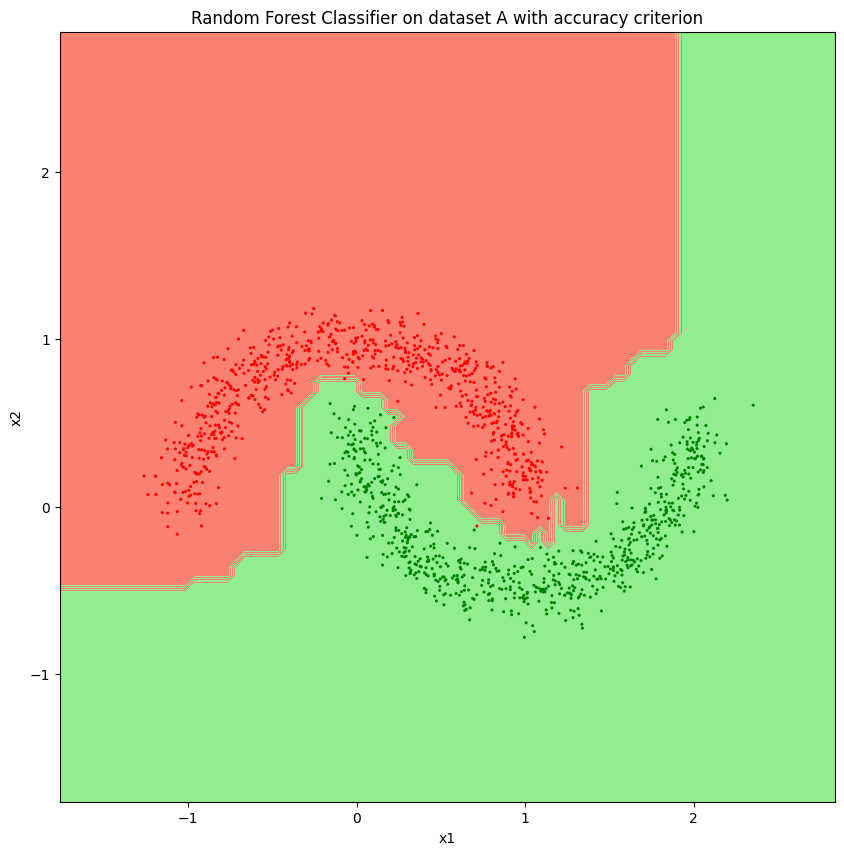

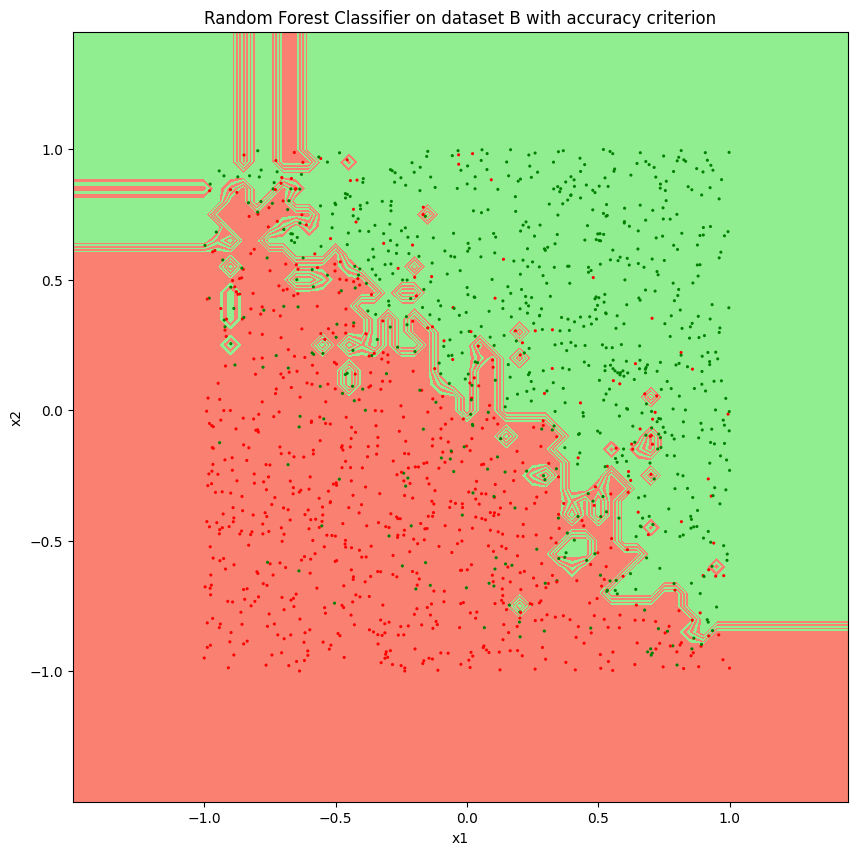

In [194]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2


def xtest(X_train, Y_train):
    x1_train = X_train[:, 0]
    x2_train = X_train[:, 1]
    X_min = min(min(X_train[:,0]),min(X_train[:,1]))
    X_max = max(max(X_train[:,0]),max(X_train[:,1]))

    X_test = []
    col = []
    for i in range(len(X_train)):
        if Y_train[i] == 1:
            col.append("green")
        else:
            col.append("red")

    x1 = np.arange(X_min-0.5, X_max+0.5, 0.05)
    x2 = np.arange(X_min-0.5, X_max+0.5, 0.05)

    X, Y = np.meshgrid(x1, x2)

    for i in range(len(x1)):
        for j in range(len(x2)):
            X_test.append([X[i][j], Y[i][j]])

    X_test = np.array(X_test)
    return X_test, X, Y,col

data_A = np.load('Data/dataset_A.npz')
X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']
X_test,X,Y,col = xtest(X_train, Y_train)
tree = train_random_forest(X_train, Y_train, num_trees = 5, num_nodes_stop = 1, criterion='accuracy')
z_test = eval_random_forest(tree, X_test)
plt.figure(figsize=(10,10))
Z = z_test.reshape(X.shape)
plt.contourf(X, Y, Z, colors=['salmon', 'lightgreen'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=col, s=5, linewidth=0)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Random Forest Classifier on dataset A with accuracy criterion")
plt.show()

data_B = np.load('Data/dataset_B.npz')
X_train, Y_train, X_test, Y_test = data_B['arr_0'],data_B['arr_1'],data_B['arr_2'],data_B['arr_3']
X_test,X,Y,col = xtest(X_train, Y_train)
tree = train_random_forest(X_train, Y_train, num_trees = 50, num_nodes_stop = 1, criterion='accuracy')
z_test = eval_random_forest(tree, X_test)
plt.figure(figsize=(10,10))
Z = z_test.reshape(X.shape)
plt.contourf(X, Y, Z, colors=['salmon', 'lightgreen'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=col, s=5, linewidth=0)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Random Forest Classifier on dataset B with accuracy criterion")
plt.show()

**Cell type : TextRead**

# 8 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [190]:
# Codewrite cell
# Write code to run here (no plotting)
neg = 0
pos = 0
def split_node_dec_ada(tree, node_pos, X, Y, W, depth, num_nodes_stop = 1, criterion = 'accuracy', stop_depth = 1e7):
    global neg, pos
    n = int(np.sum(W))
    n_total, d = X.shape
    total_pos = int(np.sum(W[(Y == 1)]))
    total_neg = int(np.sum(W[(Y == -1)]))
    one_class = False
    if total_pos == 0 or total_pos == n:
        one_class = True
    if n <= num_nodes_stop or depth >= stop_depth or ((pos == total_pos) and (neg == total_neg)) or one_class:
        if total_pos > total_neg:
            class_pred = 1
        else:
            class_pred = -1
        tree[node_pos] = [-1,-1, class_pred]
        return

    neg = total_neg
    pos = total_pos
    best_feat = 0
    best_thresh = 0
    best_acc = -np.inf
    for feat in range(d):
        ids = X[:, feat].argsort()
        X = X[ids]
        Y = Y[ids]
        W = W[ids]
        min_feat = X[0][feat]
        max_feat = X[-1][feat]
        num_pts  = 11
        iter = max_feat - min_feat
        iter = iter/num_pts
        for pt in range(1, num_pts):
            thresh = min_feat + pt*iter
            pos_l = 0
            left = 0
            for sample in range(n_total):
                if X[sample][feat] <= thresh:
                    left += (W[sample])
                    if Y[sample] > 0:
                        pos_l += (W[sample])
            pos_r = total_pos - pos_l
            right = n - left
            dec = split_dec_ada(criterion, pos_l, left, pos_r, right)
            if dec >= best_acc:
                best_acc = dec
                best_feat = feat
                best_thresh = thresh
    ind = (X[:, best_feat] <= best_thresh)
    X_left = X[ind]
    Y_left = Y[ind]
    W_left = W[ind]
    ind = (X[:, best_feat] > best_thresh)
    X_right = X[ind]
    Y_right = Y[ind]
    W_right = W[ind]
    tree[node_pos] = [best_feat, best_thresh, 0]
    split_node_dec_ada(tree, 2*node_pos+1, X_left, Y_left, W_left, depth+1, num_nodes_stop, criterion, stop_depth)
    split_node_dec_ada(tree, 2*node_pos+2, X_right, Y_right, W_right, depth+1, num_nodes_stop, criterion, stop_depth)
    return

def h_func(x):
    if x == 0 or x == 1:
        return 0
    return x*np.log2(x) + (1-x)*np.log2(1-x)

def split_dec_ada(criterion, pos_l, left, pos_r, right):
    if criterion == 'accuracy':
        val = (pos_l + right - pos_r)/(left+right)
        return max(val, 1-val)
    elif criterion == 'entropy':
        p_l = left/(left+right)
        h_l = h_func(pos_l/(left+1e-40))
        p_r = 1 - p_l
        h_r = h_func(pos_r/(right+1e-40))
        return (p_l*h_l + p_r*h_r)

def eval_decision_tree(tree, test_X):

    n = test_X.shape[0]
    Y_pred = np.zeros(n)
    for i in range(n):
        Y_pred[i] = pred_class(tree, 0, test_X[i])
    return Y_pred

def weak_learner(X_train, Y_train, X_test, W, depth):

  tree = train_dt_depth(X_train,Y_train, W, depth)
  pred = eval_decision_tree(tree, X_test)
  return pred,tree

def train_dt_depth(X, Y, W, depth, criterion='accuracy'):

    tree = {}
    init_val = -1
    tree[0] = [init_val]*3
    split_node_dec_ada(tree, 0, X, Y, W, 0, 1 , criterion, depth)
    return tree


def adaboost(X, Y, depth):
  n = X.shape[0]
  W = np.ones(n)
  beta = np.zeros(50)
  learner = {}

  for i in range(50) :
    Y_pred, learner[i] = weak_learner(X, Y, X, W, depth)
    L = abs(Y-Y_pred)/2
    gamma = 1/2 - (W @ L.T)/(np.sum(W) + 1e-50)
    beta[i] = (0.5 + gamma)/(0.5 - gamma + 1e-50)
    W = [w*(beta[i]**int(L[j])) for j,w in enumerate(W)]
    W = np.array(W)
  return np.log(beta), learner

def run_ada_iter(beta, learner, X_test):

    m = X_test.shape[0]
    n_iter_tot = len(learner)
    preds = []
    for n in range(n_iter_tot) :
        pred = np.zeros(m)
        for j in range(m) :
            prediction = np.array([pred_class(learner[i],0,X_test[j]) for i in range(n+1)])
            pred[j] = prediction@beta[:n+1].T
        pred = np.sign(pred)
        preds.append(pred)
    return preds

def run_ada(beta, learner, X_test):
    m = X_test.shape[0]
    n_iter_tot = len(learner)
    pred = np.zeros(m)
    for j in range(m) :
        prediction = np.array([pred_class(learner[i], 0, X_test[j]) for i in range(n_iter_tot)])
        pred[j] = prediction@beta[:n_iter_tot+1].T
    pred = np.sign(pred)
    return pred

def pred_class(tree, node_pos, sample):
    if tree[node_pos][0] == -1:
        return tree[node_pos][2]
    loc = tree[node_pos][0]
    thresh = tree[node_pos][1]
    if sample[loc] <= thresh:
        return pred_class(tree, 2*node_pos+1, sample)
    else:
        return pred_class(tree, 2*node_pos+2, sample)



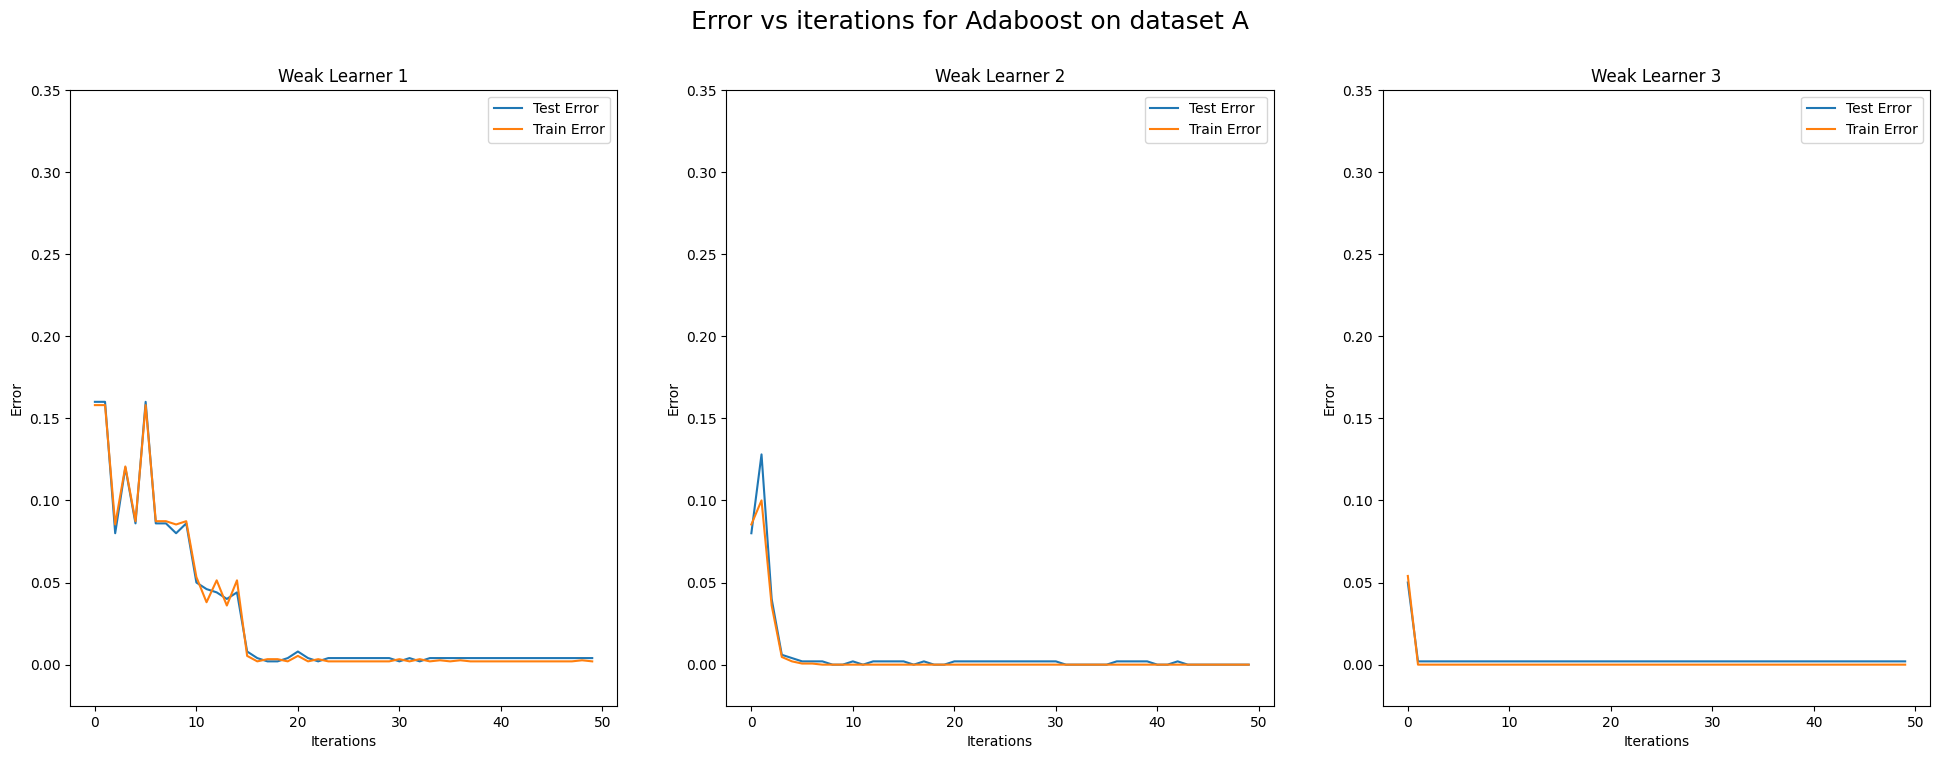

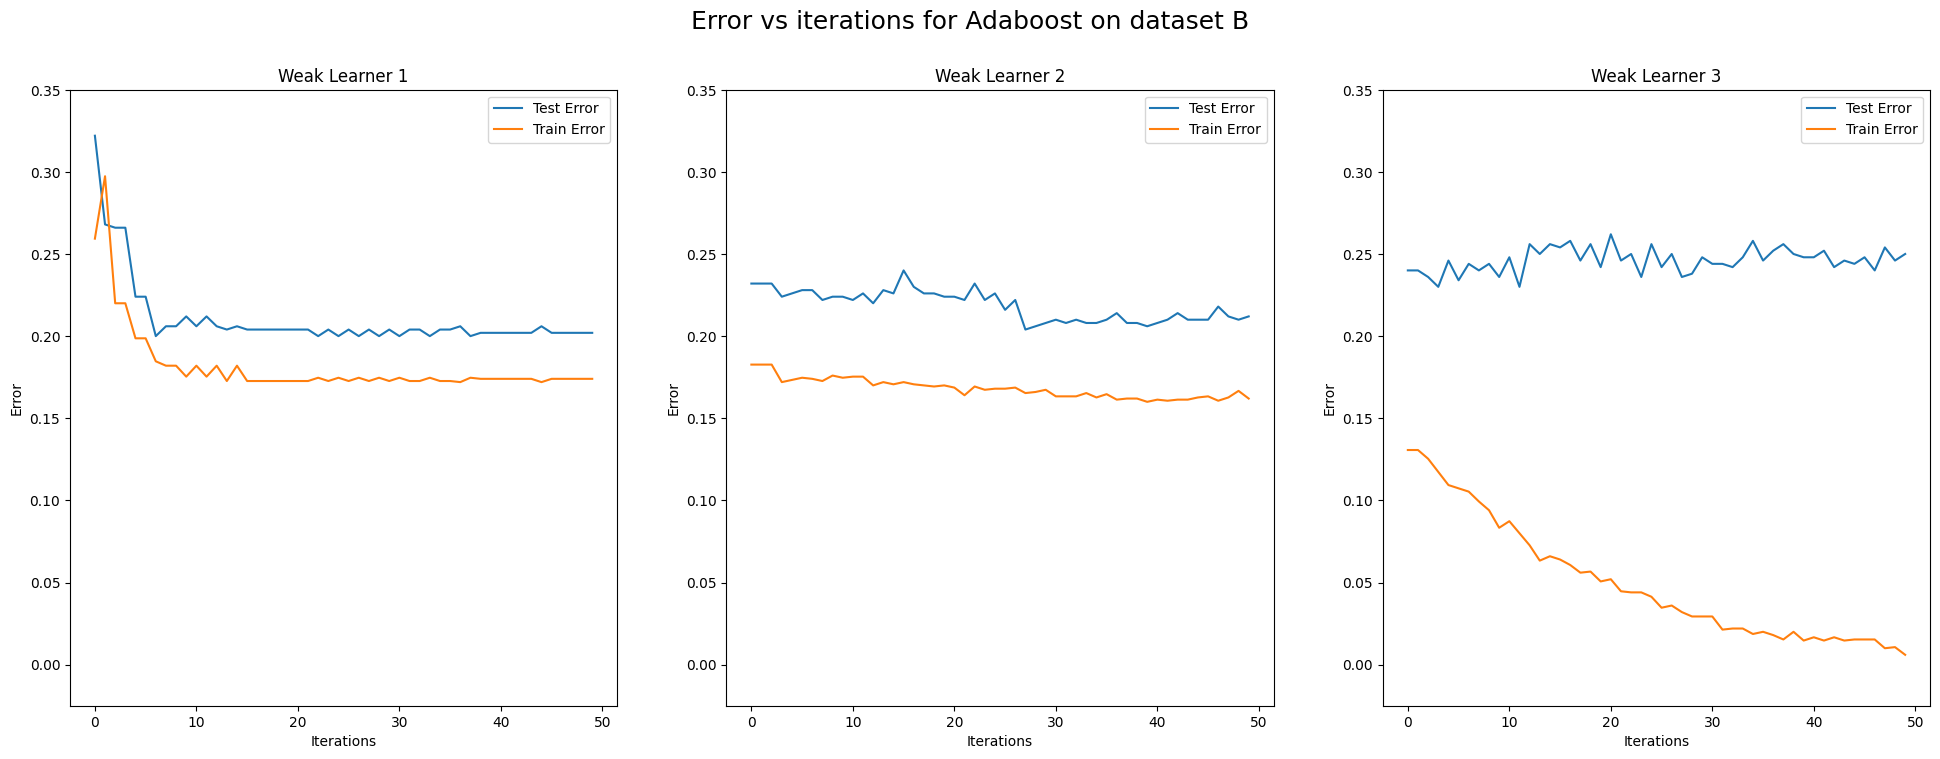

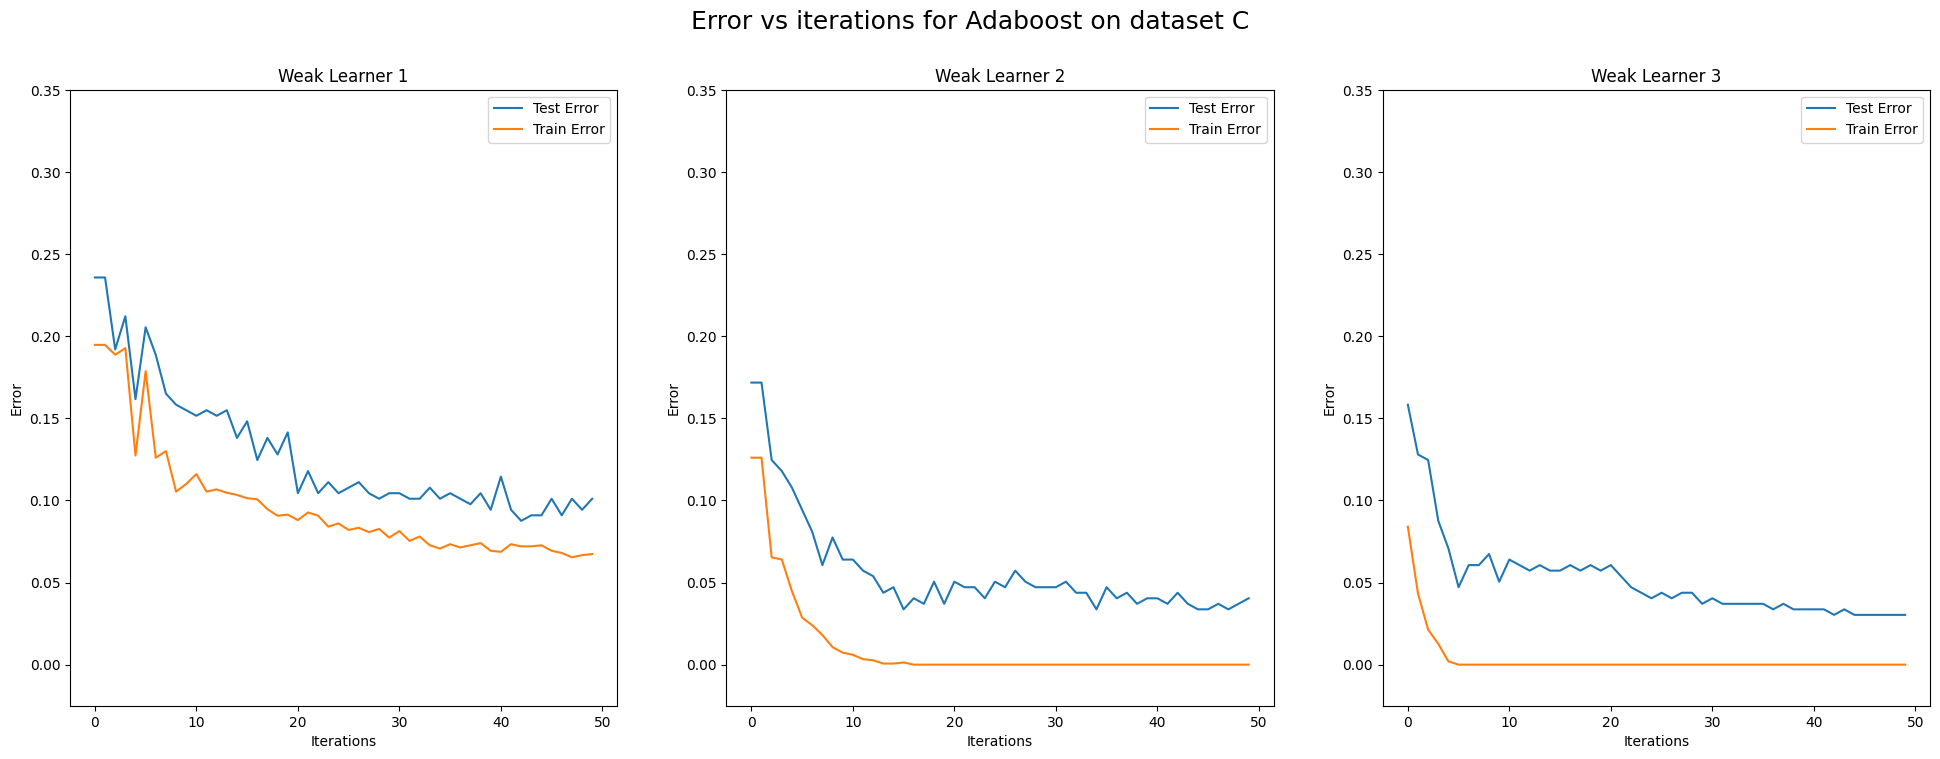

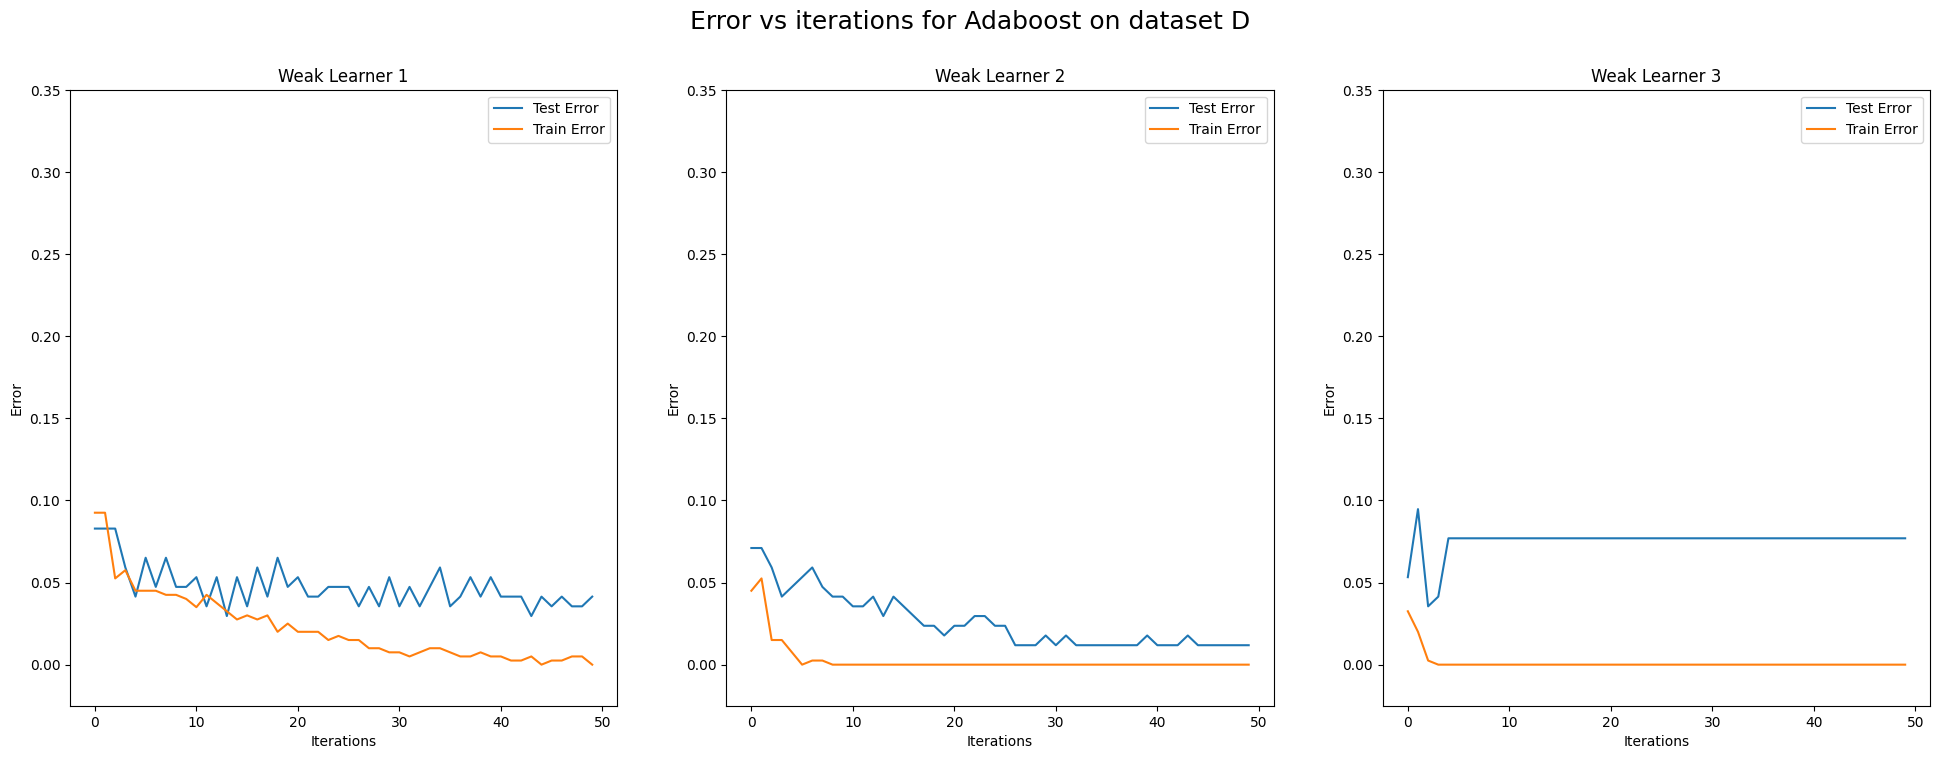

In [191]:
# Codewrite cell
# Plots for iteration vs error here
file_path = 'Data/'

def preprocess(file):
    data = np.load(file)
    X_train, Y_train, X_test, Y_test = np.array(data['arr_0']), np.array(data['arr_1']), np.array(data['arr_2']), np.array(data['arr_3'])
    #Y_train = np.vstack(Y_train)
    #Y_test = np.vstack(Y_test)
    mean, std = standardize(X_train)
    X_train = X_train-mean
    X_train = X_train/std
    X_test = X_test - mean
    X_test = X_test/std
    return X_train, Y_train, X_test, Y_test

def standardize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    return mean, (std + 1e-20)

file_num = ['A', 'B', 'C', 'D']
num_learners = 3
X_train, Y_train, X_test, Y_test = {}, {}, {}, {}
train_error = np.zeros((len(file_num), num_learners))
test_error = np.zeros((len(file_num), num_learners))
train_errs, test_errs, betas, learners = {}, {}, {}, {}

for id, file_id in enumerate(file_num):
    X_train[id], Y_train[id], X_test[id], Y_test[id] = preprocess(file_path+f"dataset_{file_id}.npz")
    plt.figure(figsize=(24, 8))
    plt.suptitle(f'Error vs iterations for Adaboost on dataset {file_id}', size=18)

    for k, depth in enumerate([1, 3, 7]):
        plt.subplot(1, 3, k+1)
        plt.gca().set_title(f"Weak Learner {k+1}")
        plt.gca().set_ylim([-0.025, 0.3500])
        plt.gca().set_xlabel("Iterations")
        plt.gca().set_ylabel("Error")

        samples = np.append(X_train[id], X_test[id], axis=0)
        betas[(id, k)], learners[(id, k)] = adaboost(X_train[id], Y_train[id], depth)

        Y_ret = run_ada_iter(betas[(id, k)], learners[(id, k)], samples)
        train_err_temp, test_err_temp = [], []

        for Y_pred in Y_ret:
            Y_pred1, Y_pred2 = Y_pred[:len(X_train[id])], Y_pred[len(X_train[id]):]
            train_err_temp.append(np.sum(Y_pred1 != Y_train[id]) / len(Y_train[id]))
            test_err_temp.append(np.sum(Y_pred2 != Y_test[id]) / len(Y_test[id]))

        x = [(i+1) for i in range(50)]
        plt.plot(np.array(test_err_temp), label="Test Error")
        plt.plot(np.array(train_err_temp), label="Train Error")

        train_errs[(id, k)] = train_err_temp
        test_errs[(id, k)] = test_err_temp

        plt.legend()

    plt.show()


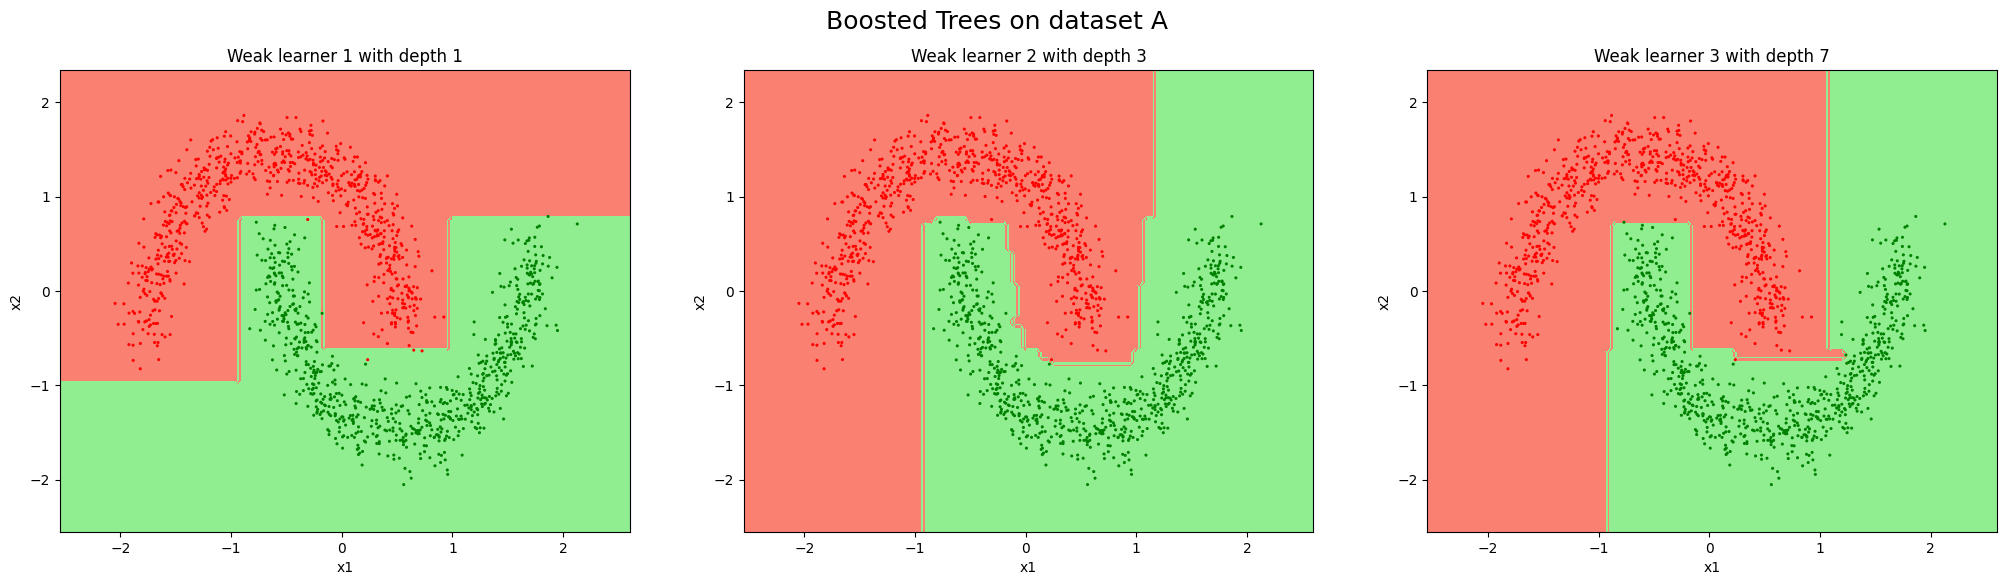

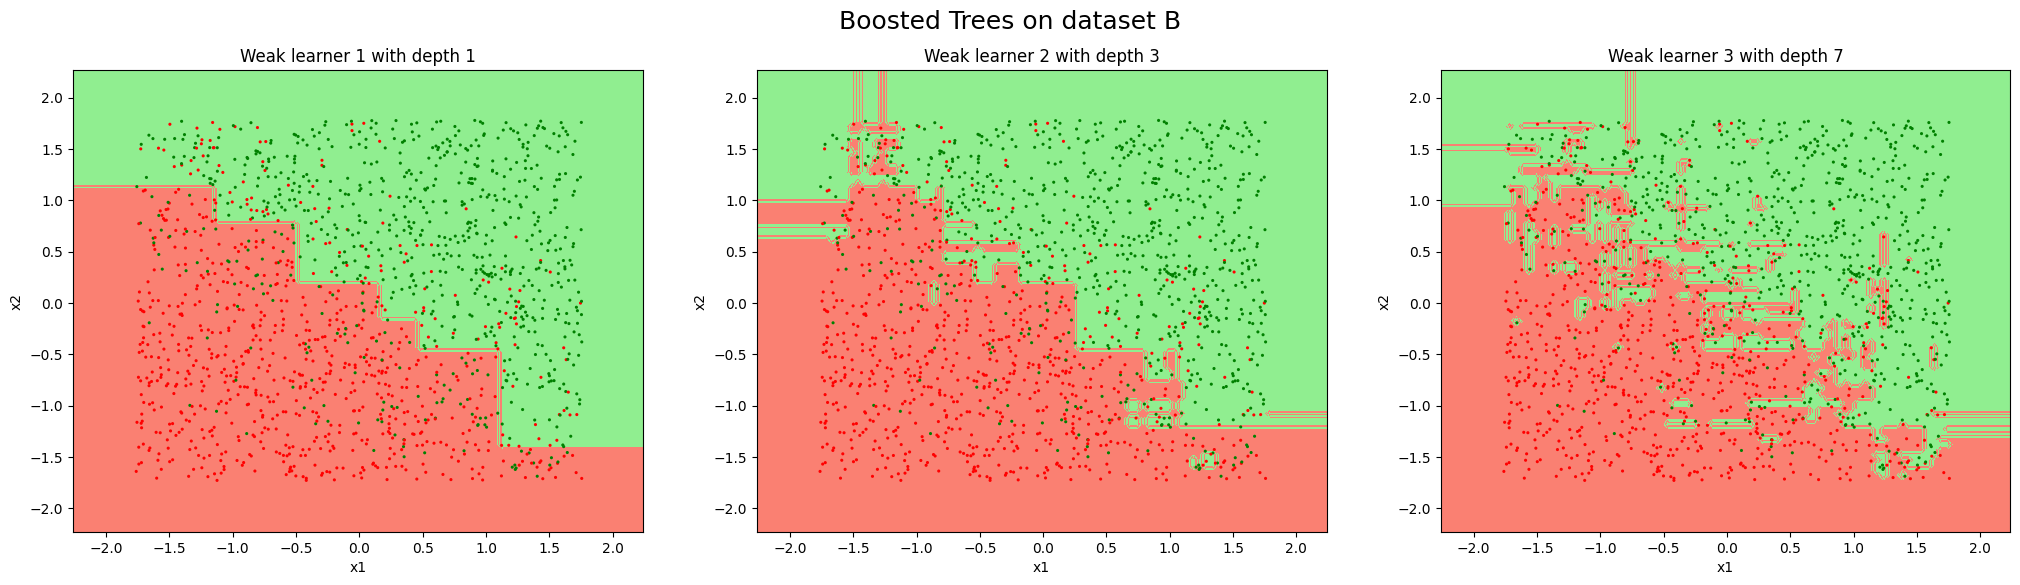

In [192]:
# Codewrite cell
# Plots for illustrating the classifier here

X_train, Y_train, X_test, Y_test = preprocess('Data/dataset_A.npz')
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
y_pred_1 = run_ada(betas[(0,0)],learners[(0,0)], testing_set)
y_pred_2 = run_ada(betas[(0,1)],learners[(0,1)], testing_set)
y_pred_3 = run_ada(betas[(0,2)],learners[(0,2)], testing_set)
col = []
for i in range(len(X_train)):
    if Y_train[i] == 1:
        col.append("green")
    else:
        col.append("red")

plt.figure(figsize=(25,6))
plt.suptitle('Boosted Trees on dataset A', size = 18)
plt.subplot(1,3,1)
plt.contourf(X, Y, y_pred_1.reshape(X.shape), colors=['salmon', 'lightgreen'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=col, s=5, linewidth=0)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Weak learner 1 with depth 1")

plt.subplot(1,3,2)
plt.contourf(X, Y, y_pred_2.reshape(X.shape), colors=['salmon', 'lightgreen'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=col, s=5, linewidth=0)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Weak learner 2 with depth 3")

plt.subplot(1,3,3)
plt.contourf(X, Y, y_pred_3.reshape(X.shape), colors=['salmon', 'lightgreen'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=col, s=5, linewidth=0)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Weak learner 3 with depth 7")
plt.show()



X_train, Y_train, X_test, Y_test = preprocess('Data/dataset_B.npz')
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
y_pred_1 = run_ada(betas[(1,0)],learners[(1,0)], testing_set)
y_pred_2 = run_ada(betas[(1,1)],learners[(1,1)], testing_set)
y_pred_3 = run_ada(betas[(1,2)],learners[(1,2)], testing_set)

col = []
for i in range(len(X_train)):
    if Y_train[i] == 1:
        col.append("green")
    else:
        col.append("red")

plt.figure(figsize=(25,6))
plt.suptitle('Boosted Trees on dataset B', size = 18)
plt.subplot(1,3,1)
plt.contourf(X, Y, y_pred_1.reshape(X.shape), colors=['salmon', 'lightgreen'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=col, s=5, linewidth=0)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Weak learner 1 with depth 1")

plt.subplot(1,3,2)
plt.contourf(X, Y, y_pred_2.reshape(X.shape), colors=['salmon', 'lightgreen'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=col, s=5, linewidth=0)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Weak learner 2 with depth 3")

plt.subplot(1,3,3)
plt.contourf(X, Y, y_pred_3.reshape(X.shape), colors=['salmon', 'lightgreen'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=col, s=5, linewidth=0)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Weak learner 3 with depth 7")
plt.show()


Textwrite cell:

**Observations:**


1. The plot of Error versus Iterations shows that even a simple classifier like a one-node decision tree can be boosted to perform similarly to random forests after a few rounds of boosting.
2. In most cases, the errors stabilize to a constant value after just a few boosting iterations, indicating that boosting quickly improves performance.
3. For dataset B, using a deeper tree as the weak learner (Weak learner-3) only reduces the training error, while the test error remains high. This suggests overfitting, where the model fits the training data too closely, resulting in poor performance on unseen data.
4. Deeper trees converge faster during training, indicating that they reach stable error rates more quickly than shallower trees.
5. A weak learner with a depth of 1 (Weak learner-1) tends to create simpler decision boundaries, while a deeper weak learner like Weak learner-3 (with a depth of 7) creates more complex decision boundaries.

**Cell type : TextRead**

# 9 Lasso Regression

Write code for learning using Lasso Regression and give your conclusions. Use the dataset LassoReg_data.npz for this question. The file contains two matrices of size 120\*1000 and 120\*1, corresponding to 120 instance points with 1000 dimensional features and its targets.

 Split the data into train-validation-test on 50-25-25 ratio. Learn the best model using Lasso Regression (use projected gradient descent, the projection oracle code is given for your convenience). Try different learning rate parameters and L1 norm ball constraint radii. Choose an appropriate learning rate that allows for convergence of the training loss.  Train the models for different L1 norm radius parameters. Choose the L1 norm constraint that works best on the validation set.

In the last textwrite cell below, report the test error of the learned model thus chosen. Also report the indices and weight values corresponding to the top 10 values of the weight vector (which is 1000 dimensional).




In [187]:
# Coderead cell

def projection_oracle_l1(w, l1_norm):
    # first remeber signs and store them. Modify w so that it is all positive then.
    signs = np.sign(w)
    w = w*signs
    # project this modified w onto the simplex in first orthant.
    d=len(w)
    # if w is already in l1 norm ball return as it is.
    if np.sum(w)<=l1_norm:
        return w*signs

    # using 1e-7 as zero here to avoid foating point issues
    for i in range(d):
        w_next = w+0
        w_next[w>1e-7] = w[w>1e-7] - np.min(w[w>1e-7])
        if np.sum(w_next)<=l1_norm:
            w = ((l1_norm - np.sum(w_next))*w + (np.sum(w) - l1_norm)*w_next)/(np.sum(w)-np.sum(w_next))
            return w*signs
        else:
            w=w_next

# test above code
# print (projection_oracle_l1(w=np.array([1.,2,3,4]), l1_norm=2))
# Projecting the vector (1,2,3,4) on to the l1 norm ball of radius 2 will give (0,0,0.5,1.5)

In [188]:
# codewrite cell:
# Use this cell to do read the data and do preprocessing (split data into train, test, val etc) and write any helper functions you may need
# like evaluating the mean squared error or the gradient w.r.t. w
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradient_mse(X, y, w):
    return 2 * np.dot(X.T, (np.dot(X, w) - y)) / X.shape[0]

data = np.load("Data/LassoReg_data.npz")
X = data['arr_0']
y = data['arr_1']

# Data Split
num_samples = X.shape[0]
num_train = int(0.5 * num_samples)
num_val = int(0.25 * num_samples)
num_test = num_samples - num_train - num_val

X_train = X[:num_train]
y_train = y[:num_train]

X_val = X[num_train:num_train+num_val]
y_val = y[num_train:num_train+num_val]

X_test = X[num_train+num_val:]
y_test = y[num_train+num_val:]

In [19]:
# codewrite cell:

# Write the code for the gradient descent routine on the training set mean square error loss function.
# Also write code for doing validation of the learned model using the validation set

def gradient_descent(X_train, y_train, X_val, y_val, learning_rate, l1_norm, epochs=1000, tol=1e-5):
    w = np.random.randn(X_train.shape[1])

    for epoch in range(epochs):
        grad = gradient_mse(X_train, y_train, w)

        w -= learning_rate * grad
        w = projection_oracle_l1(w, l1_norm)

        train_loss = mean_squared_error(y_train, np.dot(X_train, w))
        val_loss = mean_squared_error(y_val, np.dot(X_val, w))

        if np.linalg.norm(grad) < tol:
            break

    return w, train_loss, val_loss

def validate_model(X_val, y_val, w):
    val_loss = mean_squared_error(y_val, np.dot(X_val, w))
    return val_loss

learning_rates = [0.001, 0.01, 0.1]
l1_norms = [0.1, 0.5, 1.0]

best_val_loss = float('inf')
best_params = None

for lr in learning_rates:
    for l1 in l1_norms:
        #print(f"Training with learning rate: {lr}, L1 norm: {l1}")
        w, train_loss, val_loss = gradient_descent(X_train, y_train, X_val, y_val, lr, l1)
        #print(f"Training Loss: {train_loss}, Validation Loss: {val_loss}")
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_params = (lr, l1)

#print(f"Best parameters: Learning Rate = {best_params[0]}, L1 Norm = {best_params[1]}")

best_lr, best_l1 = best_params
w, train_loss, val_loss = gradient_descent(X_train, y_train, X_val, y_val, best_lr, best_l1)
test_loss = mean_squared_error(y_test, np.dot(X_test, w))
#print(f"Test Loss with best parameters: {test_loss}")

top_indices = np.argsort(np.abs(w))[::-1][:10]
top_weights = w[top_indices]
#print("Top 10 weights and their indices:")
for i, (index, weight) in (enumerate(zip(top_indices, top_weights), 1)):
     #print(f"Index: {index}, Weight: {weight}")

#Textwrite cell:

Best parameters: Learning Rate = 0.1, L1 Norm = 1.0

Test Loss with best parameters: 0.10452111369500314

**Top 10 weights and their indices:**

Index: 107, Weight: 0.8616311316222116

Index: 390, Weight: 0.13836833067239832

Index: 711, Weight: 9.861226022301468e-08

Index: 327, Weight: 8.589968769449897e-08

Index: 722, Weight: 7.593078713637354e-08

Index: 184, Weight: -7.465862082755344e-08

Index: 716, Weight: -6.593662067386208e-08

Index: 122, Weight: -6.260207949075614e-08

Index: 806, Weight: -5.769267331793074e-08

Index: 410, Weight: -1.637266091279732e-08